In [1]:
#importing nessaricy package 
import pandas as pd
import networkx as nx
from networkx.algorithms.community import girvan_newman
from random import randint
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob

C:\Users\kavan\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#data importing and view 
df = pd.read_json("C:/Users/kavan/Downloads/tesco.json")
df.head()

created_at                   id               id_str  \
0 2020-06-16 19:22:16  1272972781278371842  1272972781278371842   
1 2020-06-25 11:57:24  1276122318339743751  1276122318339743751   
2 2020-02-01 10:45:30  1223557982685929472  1223557982685929472   
3 2020-10-26 11:02:24  1320682185582645251  1320682185582645248   
4 2020-10-26 12:55:27  1320710633218781185  1320710633218781184   

                                                text display_text_range  \
0  @Tesco Hi Daniel,\nThanks for your message. I’...           [7, 140]   
1  RT @samd_official: Hey @Tesco I was about to c...               None   
2  @DiskinKyle @Cocksy87 @Tesco Even without a to...           [29, 62]   
3  RT @JodiPontin: @thewibblemovem1 @WelshGovernm...               None   
4  @Tesco I need a tampon for my man period 🤬 htt...            [0, 42]   

                                              source  truncated  \
0  <a href="http://twitter.com/download/iphone" r...       True   
1  <a href="http://twitter.com/download/iphone" r...      False   
2  <a href="http://twitter.com/download/iphone" r...      False   
3  <a href="http://twitter.com/download/android" ...      False   
4  <a href="http://twitter.com/download/android" ...      False   

   in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0           1.272972e+18               1.272972e+18         2.719861e+08  ...   
1                    NaN                        NaN                  NaN  ...   
2           1.223557e+18               1.223557e+18         3.368137e+09  ...   
3                    NaN                        NaN                  NaN  ...   
4                    NaN                        NaN         2.719861e+08  ...   

   possibly_sensitive                                     extended_tweet  \
0                 NaN  {'full_text': '@Tesco Hi Daniel,\nThanks for y...   
1                 NaN                                               None   
2                 NaN                                               None   
3                 0.0                                               None   
4                 0.0                                               None   

                                    retweeted_status quoted_status_id  \
0                                               None              NaN   
1  {'created_at': 'Thu Jun 11 14:54:21 +0000 2020...              NaN   
2                                               None              NaN   
3  {'created_at': 'Mon Oct 26 11:00:12 +0000 2020...              NaN   
4                                               None     1.305952e+18   

  quoted_status_id_str                                      quoted_status  \
0                  NaN                                               None   
1                  NaN                                               None   
2                  NaN                                               None   
3                  NaN                                               None   
4         1.305952e+18  {'created_at': 'Tue Sep 15 19:31:16 +0000 2020...   

                             quoted_status_permalink  \
0                                               None   
1                                               None   
2                                               None   
3                                               None   
4  {'url': 'https://t.co/Ra7Yk1vrKn', 'expanded':...   

                                   extended_entities  scopes  \
0                                               None     NaN   
1                                               None     NaN   
2                                               None     NaN   
3  {'media': [{'id': 1320681624397320193, 'id_str...     NaN   
4                                               None     NaN   

                                              tokens  
0  [Tesco, Hi, Daniel, Thanks, message, sure, rec...  
1  [RT, Hey, Tesco, cook, favourite, vegetable, t...  
2  [DiskinKyle, Cocks

In [3]:
#columns names
print("Columns:", df.columns.tolist())

Columns: ['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'matching_rules', 'possibly_sensitive', 'extended_tweet', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink', 'extended_entities', 'scopes', 'tokens']


In [4]:
#information of data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, 0 to 1999
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   created_at                 2000 non-null   datetime64[ns]
 1   id                         2000 non-null   int64         
 2   id_str                     2000 non-null   int64         
 3   text                       2000 non-null   object        
 4   display_text_range         955 non-null    object        
 5   source                     1999 non-null   object        
 6   truncated                  2000 non-null   bool          
 7   in_reply_to_status_id      800 non-null    float64       
 8   in_reply_to_status_id_str  800 non-null    float64       
 9   in_reply_to_user_id        1011 non-null   float64       
 10  in_reply_to_user_id_str    1011 non-null   float64       
 11  in_reply_to_screen_name    994 non-null    object        
 12  user       

In [5]:
#missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 created_at                      0
id                              0
id_str                          0
text                            0
display_text_range           1045
source                          1
truncated                       0
in_reply_to_status_id        1200
in_reply_to_status_id_str    1200
in_reply_to_user_id           989
in_reply_to_user_id_str       989
in_reply_to_screen_name      1006
user                            0
geo                          1998
coordinates                  1998
place                        1956
contributors                 2000
is_quote_status                 0
quote_count                     0
reply_count                     0
retweet_count                   0
favorite_count                  0
entities                        0
favorited                       0
retweeted                       0
filter_level                    0
lang                            0
matching_rules                  0
possibly_sensitive           16

In [6]:
#total count of data
df.shape

(2000, 38)

In [7]:
#null value in total
df.isnull().sum().sum()

30154

In [8]:
#non null data total
total_non_null_data = df.count().sum()
print("Total non-null data points:", total_non_null_data)

Total non-null data points: 45846


In [9]:
#rows and column which has a null value
df[df.isnull().any(axis=1)].head()

created_at                   id               id_str  \
0 2020-06-16 19:22:16  1272972781278371842  1272972781278371842   
1 2020-06-25 11:57:24  1276122318339743751  1276122318339743751   
2 2020-02-01 10:45:30  1223557982685929472  1223557982685929472   
3 2020-10-26 11:02:24  1320682185582645251  1320682185582645248   
4 2020-10-26 12:55:27  1320710633218781185  1320710633218781184   

                                                text display_text_range  \
0  @Tesco Hi Daniel,\nThanks for your message. I’...           [7, 140]   
1  RT @samd_official: Hey @Tesco I was about to c...               None   
2  @DiskinKyle @Cocksy87 @Tesco Even without a to...           [29, 62]   
3  RT @JodiPontin: @thewibblemovem1 @WelshGovernm...               None   
4  @Tesco I need a tampon for my man period 🤬 htt...            [0, 42]   

                                              source  truncated  \
0  <a href="http://twitter.com/download/iphone" r...       True   
1  <a href="http://twitter.com/download/iphone" r...      False   
2  <a href="http://twitter.com/download/iphone" r...      False   
3  <a href="http://twitter.com/download/android" ...      False   
4  <a href="http://twitter.com/download/android" ...      False   

   in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0           1.272972e+18               1.272972e+18         2.719861e+08  ...   
1                    NaN                        NaN                  NaN  ...   
2           1.223557e+18               1.223557e+18         3.368137e+09  ...   
3                    NaN                        NaN                  NaN  ...   
4                    NaN                        NaN         2.719861e+08  ...   

   possibly_sensitive                                     extended_tweet  \
0                 NaN  {'full_text': '@Tesco Hi Daniel,\nThanks for y...   
1                 NaN                                               None   
2                 NaN                                               None   
3                 0.0                                               None   
4                 0.0                                               None   

                                    retweeted_status quoted_status_id  \
0                                               None              NaN   
1  {'created_at': 'Thu Jun 11 14:54:21 +0000 2020...              NaN   
2                                               None              NaN   
3  {'created_at': 'Mon Oct 26 11:00:12 +0000 2020...              NaN   
4                                               None     1.305952e+18   

  quoted_status_id_str                                      quoted_status  \
0                  NaN                                               None   
1                  NaN                                               None   
2                  NaN                                               None   
3                  NaN                                               None   
4         1.305952e+18  {'created_at': 'Tue Sep 15 19:31:16 +0000 2020...   

                             quoted_status_permalink  \
0                                               None   
1                                               None   
2                                               None   
3                                               None   
4  {'url': 'https://t.co/Ra7Yk1vrKn', 'expanded':...   

                                   extended_entities  scopes  \
0                                               None     NaN   
1                                               None     NaN   
2                                               None     NaN   
3  {'media': [{'id': 1320681624397320193, 'id_str...     NaN   
4                                               None     NaN   

                                              tokens  
0  [Tesco, Hi, Daniel, Thanks, message, sure, rec...  
1  [RT, Hey, Tesco, cook, favourite, vegetable, t...  
2  [DiskinKyle, Cocks

In [10]:
#Filling missing CATEGORICAL values
df['in_reply_to_screen_name'].fillna("No Reply", inplace=True)  #for replies
df['source'].fillna("Unknown", inplace=True)  #for another text column

C:\Users\kavan\AppData\Local\Temp\ipykernel_5348\1257648021.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['in_reply_to_screen_name'].fillna("No Reply", inplace=True)  #for replies
C:\Users\kavan\AppData\Local\Temp\ipykernel_5348\1257648021.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [11]:
#Filling missing numeric values
df['retweet_count'] = df['retweet_count'].fillna(0).astype(int)
df['favorite_count'] = df['favorite_count'].fillna(0).astype(int)

In [12]:
#number of missing values per column
print(df.isnull().sum())

created_at                      0
id                              0
id_str                          0
text                            0
display_text_range           1045
source                          0
truncated                       0
in_reply_to_status_id        1200
in_reply_to_status_id_str    1200
in_reply_to_user_id           989
in_reply_to_user_id_str       989
in_reply_to_screen_name         0
user                            0
geo                          1998
coordinates                  1998
place                        1956
contributors                 2000
is_quote_status                 0
quote_count                     0
reply_count                     0
retweet_count                   0
favorite_count                  0
entities                        0
favorited                       0
retweeted                       0
filter_level                    0
lang                            0
matching_rules                  0
possibly_sensitive           1663
extended_tweet

In [13]:
#cheking if 
print(df['extended_tweet'].head())
print(type(df['extended_tweet'].iloc[0]))

0    {'full_text': '@Tesco Hi Daniel,\nThanks for y...
1                                                 None
2                                                 None
3                                                 None
4                                                 None
Name: extended_tweet, dtype: object
<class 'str'>


In [14]:
import json

#Trying parsing the JSON strings (skip nulls or errors)
def parse_extended_tweet(value):
    if pd.isna(value):
        return None
    try:
        return json.loads(value)
    except:
        return value  # already a dict or invalid

df['extended_tweet'] = df['extended_tweet'].apply(parse_extended_tweet)

In [192]:
#Defining function to extract the full text from a tweet row
def get_full_text(row):
    if isinstance(row.get('extended_tweet'), dict) and 'full_text' in row['extended_tweet']:
        return row['extended_tweet']['full_text']
    return row['text']
#Applying the function to each row in the DataFrame to create a new column 'full_text'
df['full_text'] = df.apply(get_full_text, axis=1)

IndentationError: expected an indented block after 'if' statement on line 4 (4120255758.py, line 6)

In [16]:
#orinting data head
print(df[['text', 'extended_tweet', 'full_text']].head(10))

                                                text  \
0  @Tesco Hi Daniel,\nThanks for your message. I’...   
1  RT @samd_official: Hey @Tesco I was about to c...   
2  @DiskinKyle @Cocksy87 @Tesco Even without a to...   
3  RT @JodiPontin: @thewibblemovem1 @WelshGovernm...   
4  @Tesco I need a tampon for my man period 🤬 htt...   
5  @jmacdeee @Tesco They told me it was the UK Go...   
6  @MichelleOwen7 @Tesco We should boycott all th...   
7  I signed the open letter asking @asda @Morriso...   
8                Please DM me re online order @tesco   
9  Big thanks to @Tesco for the NHS /key workers ...   

                                      extended_tweet  \
0  {'full_text': '@Tesco Hi Daniel,\nThanks for y...   
1                                               None   
2                                               None   
3                                               None   
4                                               None   
5  {'full_text': '@jmacdeee @Tesco They told me

In [17]:
#to save the dataframe to csv file without index column
df.to_csv("tesco_with_full_text.csv", index=False)
#print orgifinal file path
print("C:/Users/kavan/Downloads/tesco.json")

C:/Users/kavan/Downloads/tesco.json


In [18]:
#to check data
df_check = pd.read_csv("tesco_with_full_text.csv")
df_check.head()

created_at                   id               id_str  \
0  2020-06-16 19:22:16  1272972781278371842  1272972781278371842   
1  2020-06-25 11:57:24  1276122318339743751  1276122318339743751   
2  2020-02-01 10:45:30  1223557982685929472  1223557982685929472   
3  2020-10-26 11:02:24  1320682185582645251  1320682185582645248   
4  2020-10-26 12:55:27  1320710633218781185  1320710633218781184   

                                                text display_text_range  \
0  @Tesco Hi Daniel,\nThanks for your message. I’...           [7, 140]   
1  RT @samd_official: Hey @Tesco I was about to c...                NaN   
2  @DiskinKyle @Cocksy87 @Tesco Even without a to...           [29, 62]   
3  RT @JodiPontin: @thewibblemovem1 @WelshGovernm...                NaN   
4  @Tesco I need a tampon for my man period 🤬 htt...            [0, 42]   

                                              source  truncated  \
0  <a href="http://twitter.com/download/iphone" r...       True   
1  <a href="http://twitter.com/download/iphone" r...      False   
2  <a href="http://twitter.com/download/iphone" r...      False   
3  <a href="http://twitter.com/download/android" ...      False   
4  <a href="http://twitter.com/download/android" ...      False   

   in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  ...  \
0           1.272972e+18               1.272972e+18         2.719861e+08  ...   
1                    NaN                        NaN                  NaN  ...   
2           1.223557e+18               1.223557e+18         3.368137e+09  ...   
3                    NaN                        NaN                  NaN  ...   
4                    NaN                        NaN         2.719861e+08  ...   

                                      extended_tweet  \
0  {'full_text': '@Tesco Hi Daniel,\nThanks for y...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                    retweeted_status quoted_status_id  \
0                                                NaN              NaN   
1  {'created_at': 'Thu Jun 11 14:54:21 +0000 2020...              NaN   
2                                                NaN              NaN   
3  {'created_at': 'Mon Oct 26 11:00:12 +0000 2020...              NaN   
4                                                NaN     1.305952e+18   

  quoted_status_id_str                                      quoted_status  \
0                  NaN                                                NaN   
1                  NaN                                                NaN   
2                  NaN                                                NaN   
3                  NaN                                                NaN   
4         1.305952e+18  {'created_at': 'Tue Sep 15 19:31:16 +0000 2020...   

                             quoted_status_permalink  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4  {'url': 'https://t.co/Ra7Yk1vrKn', 'expanded':...   

                                   extended_entities  scopes  \
0                                                NaN     NaN   
1                                                NaN     NaN   
2                                                NaN     NaN   
3  {'media': [{'id': 1320681624397320193, 'id_str...     NaN   
4                                                NaN     NaN   

                                              tokens  \
0  ['Tesco', 'Hi', 'Daniel', 'Thanks', 'message',...   
1  ['RT', 'Hey', 'Tesco', 'cook', 'favourite', 'v...   
2  ['DiskinKyle', 'Cocksy87', 'Tesco', 'Even', 'w...   
3  ['RT', 'JodiPontin', 'thewibblemovem1', 'Welsh...   
4  ['Tesco', 'need', 

In [19]:
# Re-create the 'author' column from the 'user' dictionary
import ast

# First, convert 'user' column from string back to dictionary if needed
df['user'] = df['user'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Now extract the screen_name
df['author'] = df['user'].apply(lambda x: x.get('screen_name') if pd.notnull(x) else 'Unknown')

In [20]:
# Filling missing values in categorical
df['in_reply_to_screen_name'].fillna("No Reply", inplace=True)
df['source'].fillna("Unknown", inplace=True)
df['author'].fillna("Unknown", inplace=True)
df['full_text'].fillna("No text available", inplace=True)
df['text'].fillna("No text available", inplace=True)
df['lang'].fillna("Unknown", inplace=True)
df['possibly_sensitive'].fillna(False, inplace=True)

#Filling location-related fields
df['geo'].fillna("Not available", inplace=True)
df['coordinates'].fillna("Not available", inplace=True)
df['place'].fillna("Not available", inplace=True)

#Filling numeric fields with 0
df['retweet_count'].fillna(0, inplace=True)
df['favorite_count'].fillna(0, inplace=True)
df['reply_count'] = df.get('reply_count', 0).fillna(0)  # if exists
df['quote_count'] = df.get('quote_count', 0).fillna(0)  # if exists

# Optional: Drop extended_tweet/retweeted_status if not needed
# df.drop(columns=['extended_tweet', 'retweeted_status'], inplace=True)

C:\Users\kavan\AppData\Local\Temp\ipykernel_5348\73130907.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['in_reply_to_screen_name'].fillna("No Reply", inplace=True)
C:\Users\kavan\AppData\Local\Temp\ipykernel_5348\73130907.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [21]:
#Shows first 10 cleaned rows
df[['author', 'full_text', 'retweet_count', 'favorite_count', 'in_reply_to_screen_name', 'source']].head(10)

author                                          full_text  \
0         porlhews  @Tesco Hi Daniel,\nThanks for your message. I’...   
1     xo_leahwells  RT @samd_official: Hey @Tesco I was about to c...   
2     CallumCarey1  @DiskinKyle @Cocksy87 @Tesco Even without a to...   
3  thewibblemovem1  RT @JodiPontin: @thewibblemovem1 @WelshGovernm...   
4  TheFellaShipPod  @Tesco I need a tampon for my man period 🤬 htt...   
5     1940_david11  @jmacdeee @Tesco They told me it was the UK Go...   
6         cocky222  @MichelleOwen7 @Tesco We should boycott all th...   
7          jeminus  I signed the open letter asking @asda @Morriso...   
8    ColonialCocoa                Please DM me re online order @tesco   
9      becker_shaw  Big thanks to @Tesco for the NHS /key workers ...   

   retweet_count  favorite_count in_reply_to_screen_name  \
0              0               0                   Tesco   
1              0               0                No Reply   
2              0               1              DiskinKyle   
3              0               0                No Reply   
4              0               0                   Tesco   
5              1               9                jmacdeee   
6              0               0           MichelleOwen7   
7              0               0                No Reply   
8              0               0                No Reply   
9              0               3                No Reply   

                                              source  
0  <a href="http://twitter.com/download/iphone" r...  
1  <a href="http://twitter.com/download/iphone" r...  
2  <a href="http://twitter.com/download/iphone" r...  
3  <a href="http://twitter.com/download/android" ...  
4  <a href="http://twitter.com/download/android" ...  
5  <a href="https://mobile.twitter.com" rel="nofo...  
6  <a href="http://twitter.com/#!/download/ipad" ...  
7  <a href="http://twitter.com/download/iphone" r...  
8  <a href="http://twitter.com/download/iphone" r...  
9  <a href="http://twitter.com/download/android" ...

In [22]:
#print missing values
print("Missing values remaining:\n", df.isnull().sum())

Missing values remaining:
 created_at                      0
id                              0
id_str                          0
text                            0
display_text_range           1045
source                          0
truncated                       0
in_reply_to_status_id        1200
in_reply_to_status_id_str    1200
in_reply_to_user_id           989
in_reply_to_user_id_str       989
in_reply_to_screen_name         0
user                            0
geo                             0
coordinates                     0
place                           0
contributors                 2000
is_quote_status                 0
quote_count                     0
reply_count                     0
retweet_count                   0
favorite_count                  0
entities                        0
favorited                       0
retweeted                       0
filter_level                    0
lang                            0
matching_rules                  0
possibly_sensitive   

In [23]:
#removing null columns
df.drop(columns=[
    'in_reply_to_status_id', 'in_reply_to_status_id_str',
    'in_reply_to_user_id', 'in_reply_to_user_id_str',
    'contributors', 'display_text_range', 'truncated',
    'extended_tweet', 'quoted_status_id', 'quoted_status_id_str',
    'quoted_status', 'quoted_status_permalink', 'extended_entities',
    'scopes', 'entities', 'favorited', 'retweeted', 'filter_level',
    'matching_rules'
], inplace=True, errors='ignore')

In [24]:
#print remaining null 
print("Remaining nulls:\n", df.isnull().sum())

Remaining nulls:
 created_at                    0
id                            0
id_str                        0
text                          0
source                        0
in_reply_to_screen_name       0
user                          0
geo                           0
coordinates                   0
place                         0
is_quote_status               0
quote_count                   0
reply_count                   0
retweet_count                 0
favorite_count                0
lang                          0
possibly_sensitive            0
retweeted_status           1264
tokens                        0
full_text                     0
author                        0
dtype: int64


In [25]:
#checking what all there in dataset 
df.drop(columns=[
    'in_reply_to_status_id', 'in_reply_to_status_id_str',
    'in_reply_to_user_id', 'in_reply_to_user_id_str',
    'contributors', 'display_text_range', 'truncated',
    'extended_tweet', 'quoted_status_id', 'quoted_status_id_str',
    'quoted_status', 'quoted_status_permalink', 'extended_entities',
    'scopes', 'entities', 'favorited', 'retweeted', 'filter_level',
    'matching_rules'
], inplace=True, errors='ignore')

In [26]:
#keeping the coloumn
columns_to_keep = [
    'created_at', 'id', 'id_str', 'author', 'in_reply_to_screen_name',
    'retweet_count', 'favorite_count', 'reply_count', 'quote_count',
    'lang', 'source', 'possibly_sensitive',
    'geo', 'coordinates', 'place',
    'full_text'
]

df = df[columns_to_keep]

In [27]:
#to see data
df.head()

created_at                   id               id_str  \
0 2020-06-16 19:22:16  1272972781278371842  1272972781278371842   
1 2020-06-25 11:57:24  1276122318339743751  1276122318339743751   
2 2020-02-01 10:45:30  1223557982685929472  1223557982685929472   
3 2020-10-26 11:02:24  1320682185582645251  1320682185582645248   
4 2020-10-26 12:55:27  1320710633218781185  1320710633218781184   

            author in_reply_to_screen_name  retweet_count  favorite_count  \
0         porlhews                   Tesco              0               0   
1     xo_leahwells                No Reply              0               0   
2     CallumCarey1              DiskinKyle              0               1   
3  thewibblemovem1                No Reply              0               0   
4  TheFellaShipPod                   Tesco              0               0   

   reply_count  quote_count lang  \
0            2            0   en   
1            0            0   en   
2            0            0   en   
3            0            0   en   
4            0            0   en   

                                              source possibly_sensitive  \
0  <a href="http://twitter.com/download/iphone" r...              False   
1  <a href="http://twitter.com/download/iphone" r...              False   
2  <a href="http://twitter.com/download/iphone" r...              False   
3  <a href="http://twitter.com/download/android" ...                0.0   
4  <a href="http://twitter.com/download/android" ...                0.0   

             geo    coordinates          place  \
0  Not available  Not available  Not available   
1  Not available  Not available  Not available   
2  Not available  Not available  Not available   
3  Not available  Not available  Not available   
4  Not available  Not available  Not available   

                                           full_text  
0  @Tesco Hi Daniel,\nThanks for your message. I’...  
1  RT @samd_official: Hey @Tesco I was about to c...  
2  @DiskinKyle @Cocksy87 @Tesco Even without a to...  
3  RT @JodiPontin: @thewibblemovem1 @WelshGovernm...  
4  @Tesco I need a tampon for my man period 🤬 htt...

In [28]:
#social networking analytics 

In [29]:
#importing packages
import pandas as pd
from random import randint

#random user interaction network
user_list1 = ['No%s' % randint(1, 5) for x in range(30)]
user_list2 = ['No%s' % randint(1, 5) for x in range(30)]

user_network_df = pd.DataFrame({
    'user1': user_list1,
    'user2': user_list2
})

user_network_df['linkage'] = [randint(0, 1) for x in range(30)]

In [30]:
#Removeing self-links 
user_network_df = user_network_df[user_network_df['user1'] != user_network_df['user2']]

#Displaying the result
user_network_df.head()

user1 user2  linkage
0   No4   No3        1
2   No3   No5        0
3   No4   No5        1
4   No4   No5        0
5   No5   No4        1

In [31]:
#Displaying the result
user_network_df

user1 user2  linkage
0    No4   No3        1
2    No3   No5        0
3    No4   No5        1
4    No4   No5        0
5    No5   No4        1
6    No5   No1        0
7    No1   No4        0
8    No3   No2        0
9    No5   No3        0
10   No1   No4        1
11   No1   No2        0
12   No4   No2        0
13   No3   No1        0
14   No4   No5        0
16   No2   No1        0
18   No4   No1        0
19   No5   No1        1
20   No3   No2        0
21   No3   No4        0
22   No3   No5        0
23   No3   No1        0
24   No1   No2        0
25   No2   No4        1
26   No3   No5        1
28   No4   No1        0
29   No4   No3        1

In [32]:
#filtering Datafram to keep only row where linkage column is equal to 1
user_network_df = user_network_df[user_network_df['linkage']==1]

In [33]:
#printing number of remaining row after filtering
print ("There are %s linkages after cleaning the dataset"%len(user_network_df))

There are 8 linkages after cleaning the dataset


In [34]:
user_dnet_df = user_network_df.groupby(by=['user1','user2'])['linkage'].sum().reset_index()

In [35]:
#Displaying the result
user_network_df.head()

user1 user2  linkage
0    No4   No3        1
3    No4   No5        1
5    No5   No4        1
10   No1   No4        1
19   No5   No1        1

In [36]:
#Displaying the result
user_dnet_df

user1 user2  linkage
0   No1   No4        1
1   No2   No4        1
2   No3   No5        1
3   No4   No3        2
4   No4   No5        1
5   No5   No1        1
6   No5   No4        1

In [37]:
#direct networking 
sorted([1,3,2])

[1, 2, 3]

In [38]:
#sorting nodes
sorted(['N1','N3','N2'])

['N1', 'N2', 'N3']

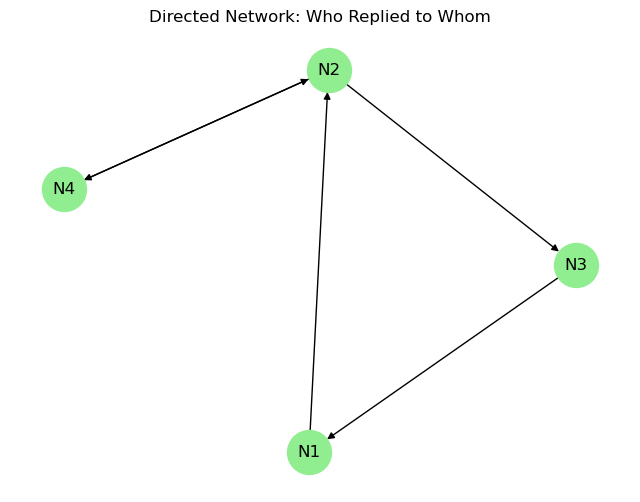

In [39]:
#Simulated mini dataset
data = {
    'author': ['N1', 'N2', 'N3', 'N4', 'N2'],
    'in_reply_to_screen_name': ['N2', 'N3', 'N1', 'N2', 'N4']
}
df = pd.DataFrame(data)

#Create edge list from reply relationships
edges = list(zip(df['author'], df['in_reply_to_screen_name']))

#Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

#Draw the graph
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, with_labels=True, node_size=1000, node_color='lightgreen', arrows=True, font_size=12)
plt.title("Directed Network: Who Replied to Whom")
plt.axis('off')
plt.show()


In [40]:
#Simulated mini dataset
data = {
    'author': ['N1', 'N2', 'N3', 'N4', 'N2'],
    'in_reply_to_screen_name': ['N2', 'N3', 'N1', 'N2', 'N4']
}
df = pd.DataFrame(data)

In [41]:
#Create edge list from reply relationships
edges = list(zip(df['author'], df['in_reply_to_screen_name']))

In [42]:
#Create a directed graph
G = nx.DiGraph()
G.add_edges_from(edges)

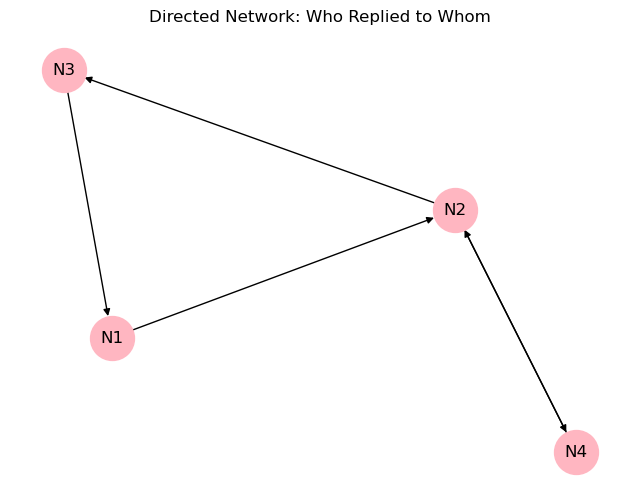

In [43]:
#Draw the graph
plt.figure(figsize=(8, 6))
nx.draw_networkx(G, with_labels=True, node_size=1000, node_color='lightpink', arrows=True, font_size=12)
plt.title("Directed Network: Who Replied to Whom")
plt.axis('off')
plt.show()

In [44]:
#Network Statistics
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
print("Density:", nx.density(G))

Nodes: 4
Edges: 5
Density: 0.4166666666666667


In [45]:
from collections import Counter
#Counting the number of replies between user pairs (edges)
edge_counter = Counter(edges)

G_df = nx.DiGraph()
for edge, weight in edge_counter.items():
    G_df.add_edge(edge[0], edge[1], linkage=weight)

In [46]:
#Createing a small test undirected network dataset
user_list1 = ['N%s' % randint(1, 5) for _ in range(30)]
user_list2 = ['N%s' % randint(1, 5) for _ in range(30)]

user_undnet_df = pd.DataFrame({
    'user1': user_list1,
    'user2': user_list2
})

#Removeing a self-links
user_undnet_df = user_undnet_df[user_undnet_df['user1'] != user_undnet_df['user2']]

# Add random linkage strength (1 or 2)
user_undnet_df['linkage'] = [randint(1, 2) for _ in range(len(user_undnet_df))]

user_undnet_df.head()

user1 user2  linkage
0    N3    N1        1
1    N5    N3        1
3    N5    N1        1
4    N3    N2        1
5    N3    N4        1

In [47]:
#from pandas Dataframe using users 
G = nx.from_pandas_edgelist(user_undnet_df, 'user1', 'user2', ['linkage'])
eigenvector_centrality = nx.eigenvector_centrality(G, weight='linkage')
eigenvector_centrality_df = pd.DataFrame(list(eigenvector_centrality.items()), columns=['User', 'Eigenvector Centrality'])

eigenvector_centrality_df.head(10)

User  Eigenvector Centrality
0   N3                0.500962
1   N1                0.432267
2   N5                0.500962
3   N2                0.432267
4   N4                0.352655

In [48]:
# Degree Centrality for undirected graphs, use G.to_undirected

G = nx.from_pandas_edgelist(user_undnet_df, 'user1', 'user2', ['linkage'])

degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)

Degree Centrality: {'N3': 1.0, 'N1': 1.0, 'N5': 1.0, 'N2': 1.0, 'N4': 1.0}


In [49]:
#Closeness Centrality
closeness_centrality = nx.closeness_centrality(G)
print("Closeness Centrality:", closeness_centrality)

Closeness Centrality: {'N3': 1.0, 'N1': 1.0, 'N5': 1.0, 'N2': 1.0, 'N4': 1.0}


In [50]:
# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G)
print("Betweenness Centrality:", betweenness_centrality)

Betweenness Centrality: {'N3': 0.0, 'N1': 0.0, 'N5': 0.0, 'N2': 0.0, 'N4': 0.0}


In [51]:
#Eigenvector Centrality
# For directed graphs, eigenvector centrality calculation might not converge for some graphs.
eigenvector_centrality = nx.eigenvector_centrality(G, weight='linkage')
print("Eigenvector Centrality:", eigenvector_centrality)

Eigenvector Centrality: {'N3': 0.500961529682702, 'N1': 0.4322668614572345, 'N5': 0.500961529682702, 'N2': 0.4322668614572345, 'N4': 0.352655373598303}


In [52]:
#creating combined DataFrame with all centrality measures
centrality_df = pd.DataFrame({
    'user': degree_centrality.keys(),
    'degree_centrality': degree_centrality.values(),
    'closeness_centrality': closeness_centrality.values(),
    'betweenness_entrality': betweenness_centrality.values(),
    'eigenvector_centrality': eigenvector_centrality.values()
})

In [53]:
centrality_df.round(3)

user  degree_centrality  closeness_centrality  betweenness_entrality  \
0   N3                1.0                   1.0                    0.0   
1   N1                1.0                   1.0                    0.0   
2   N5                1.0                   1.0                    0.0   
3   N2                1.0                   1.0                    0.0   
4   N4                1.0                   1.0                    0.0   

   eigenvector_centrality  
0                   0.501  
1                   0.432  
2                   0.501  
3                   0.432  
4                   0.353

In [54]:
#Edge-level metrics,The number of shortest paths that pass through an edge, highlighting its role in connecting different parts of the network.
edge_betweenness_centrality = nx.edge_betweenness_centrality(G)
edge_betweenness_centrality

{('N3', 'N1'): 0.1,
 ('N3', 'N5'): 0.1,
 ('N3', 'N2'): 0.1,
 ('N3', 'N4'): 0.1,
 ('N1', 'N5'): 0.1,
 ('N1', 'N4'): 0.1,
 ('N1', 'N2'): 0.1,
 ('N5', 'N2'): 0.1,
 ('N5', 'N4'): 0.1,
 ('N2', 'N4'): 0.1}

In [55]:
# Convert the edge betweenness centrality dictionary into a DataFrame for better visualization
edge_betweenness_df = pd.DataFrame(list(edge_betweenness_centrality.items()), columns=['edge', 'betweenness_centrality'])

edge_betweenness_df.head()

edge  betweenness_centrality
0  (N3, N1)                     0.1
1  (N3, N5)                     0.1
2  (N3, N2)                     0.1
3  (N3, N4)                     0.1
4  (N1, N5)                     0.1

In [56]:
# Calculate network density
density = nx.density(G)
print(f"Density: {density}")

Density: 1.0


In [57]:
#calculate network averge path length
average_path_length = nx.average_shortest_path_length(G)
print (f'Average path length: {average_path_length}')

Average path length: 1.0


In [58]:
#Modularity requires community detection. We'll use the greedy_modularity_communities function for demonstration.
#This function works on undirected graphs, so we'll consider an undirected version of our graph for this part.
G_undirected = G.to_undirected()

from networkx.algorithms.community import greedy_modularity_communities

# Detect communities
communities = list(greedy_modularity_communities(G_undirected))

# Calculate modularity (NetworkX doesn't have a built-in function for this, so we use the community quality module from NetworkX)
modularity = nx.algorithms.community.quality.modularity(G_undirected, communities)
print(f"Modularity: {modularity}")

Modularity: 0.0


In [66]:
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

# Extract unique users from both columns
unique_users = pd.unique(user_undnet_df[['user1', 'user2']].values.ravel('K'))

# Create an empty square DataFrame to store distances
distances = pd.DataFrame(np.zeros((len(unique_users), len(unique_users))),
                         index=unique_users,
                         columns=unique_users)

# Fill the DataFrame with the connection strengths (symmetrically)
for _, row in user_undnet_df.iterrows():
    distances.at[row['user1'], row['user2']] = row['linkage']
    distances.at[row['user2'], row['user1']] = row['linkage']

# Transform connection strengths into distances.
# The transformation 1/(value+1) is applied to off-diagonals only.
# First, compute the transformed matrix
transformed = 1 / (distances + 1)

# Set diagonal back to 0 (since self-distance should be 0)
np.fill_diagonal(transformed.values, 0)
distances = transformed

In [67]:
#distances

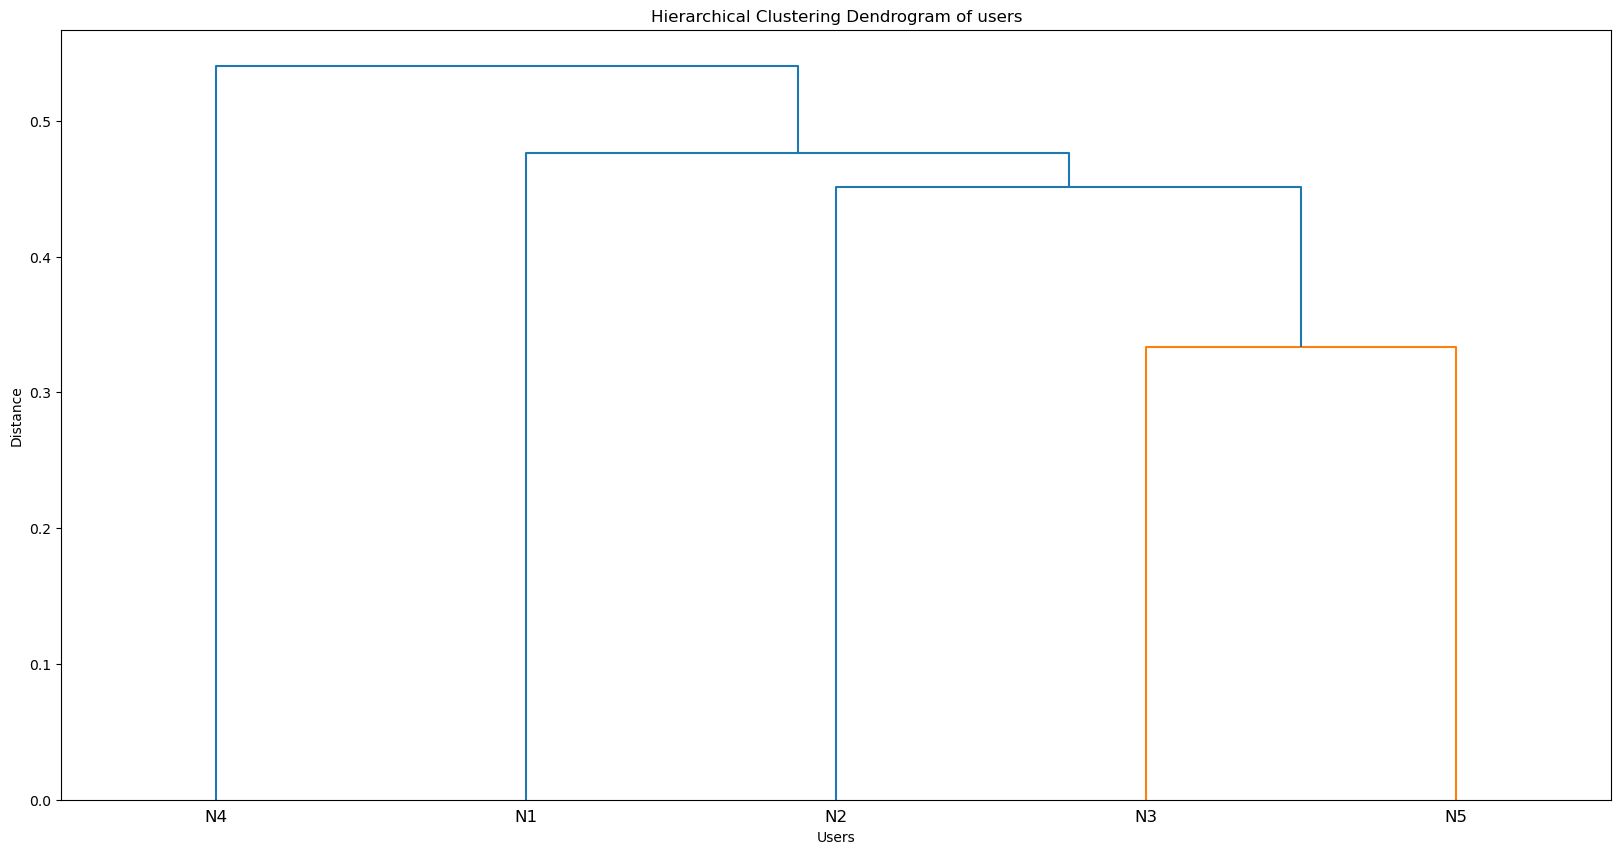

In [68]:
# Convert the square distance matrix into a condensed distance matrix
condensed_dist_matrix = squareform(distances, checks=False)

# Perform hierarchical clustering using Ward's method
Z = linkage(condensed_dist_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(20, 10))
plt.title('Hierarchical Clustering Dendrogram of users')
dendrogram(Z, labels=unique_users)
plt.xlabel('Users')
plt.ylabel('Distance')
plt.show()

In [69]:
#loading dataset
df = pd.read_json("C:/Users/kavan/Downloads/tesco.json")

In [70]:
#coverting string representations of python data in the user column back to actual oython onjects
df['user'] = df['user'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [71]:
#Extracting the 'screen_name' from each user dictionary and store it in a new column 'user_screen_name'
df['user_screen_name'] = [x['screen_name'] for x in df['user']]

In [72]:
# Create a new DataFrame with only the rows where replies exist, by selecting user and the user they replied 
reply_df = df[['user_screen_name','in_reply_to_screen_name']].dropna()

In [73]:
# Add a new column 'reply' to indicate the presence of a reply (used as an edge weight or flag)
reply_df['reply'] = 1

In [74]:
reply_df = reply_df.groupby(by=['user_screen_name','in_reply_to_screen_name']).count().reset_index()
reply_df.head()

user_screen_name in_reply_to_screen_name  reply
0     1940_david11                jmacdeee      1
1   1kilroywashere                   Tesco      1
2   2000mrsdickson          2000mrsdickson      1
3           2m0sql             DavidMm3dds      1
4   2ndstarcosplay                   Tesco      1

In [75]:
df.columns.values

array(['created_at', 'id', 'id_str', 'text', 'display_text_range',
       'source', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user',
       'geo', 'coordinates', 'place', 'contributors', 'is_quote_status',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'entities', 'favorited', 'retweeted', 'filter_level', 'lang',
       'matching_rules', 'possibly_sensitive', 'extended_tweet',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'quoted_status_permalink', 'extended_entities',
       'scopes', 'tokens', 'user_screen_name'], dtype=object)

In [76]:
df['entities'].values[1]

"{'hashtags': [], 'urls': [], 'user_mentions': [{'screen_name': 'samd_official', 'name': 'Sam Darlaston', 'id': 532291818, 'id_str': '532291818', 'indices': [3, 17]}, {'screen_name': 'Tesco', 'name': 'Tesco', 'id': 271986064, 'id_str': '271986064', 'indices': [23, 29]}], 'symbols': []}"

In [77]:
df['user_screen_name']

0              porlhews
1          xo_leahwells
2          CallumCarey1
3       thewibblemovem1
4       TheFellaShipPod
             ...       
1995       BerylClifton
1996        Dickysparks
1997         cain_terry
1998      EniolaLillian
1999      RachelDavies_
Name: user_screen_name, Length: 2000, dtype: object

In [78]:
df[['text','user_screen_name']].values[1]

array(['RT @samd_official: Hey @Tesco I was about to cook my favourite vegetable of all time (broccoli) and after unwrapping it, to my surprise, fo…',
       'xo_leahwells'], dtype=object)

In [79]:
#Converting any stringified dictionary in the 'entities' column into an actual Python dictionary
df['entities'] = df['entities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [80]:
df['mention_screen_names'] = df['entities'].apply(
    lambda x: [user['screen_name'] for user in x['user_mentions']] if 'user_mentions' in x else [])

In [81]:
df['mention_screen_names']

0                                                 [Tesco]
1                                  [samd_official, Tesco]
2                 [DiskinKyle, Cocksy87, Tesco, Cocksy87]
3       [JodiPontin, thewibblemovem1, WelshGovernment,...
4                                                 [Tesco]
                              ...                        
1995                                              [Tesco]
1996    [HNM_PMurray, FoodwiseWomen, cityorienteer, jo...
1997                             [hygienistdirect, Tesco]
1998                               [nicholasmith6, Tesco]
1999                                              [Tesco]
Name: mention_screen_names, Length: 2000, dtype: object

In [82]:
#converting any stringified dictionaries in the 'entities' column to actual Python dictionaries
df['entities'] = df['entities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


df['mention_screen_names'] = df['entities'].apply(
    lambda x: [m['screen_name'] for m in x.get('user_mentions', [])]
)

In [83]:
df[['user_screen_name', 'mention_screen_names']].head()

user_screen_name                               mention_screen_names
0         porlhews                                            [Tesco]
1     xo_leahwells                             [samd_official, Tesco]
2     CallumCarey1            [DiskinKyle, Cocksy87, Tesco, Cocksy87]
3  thewibblemovem1  [JodiPontin, thewibblemovem1, WelshGovernment,...
4  TheFellaShipPod                                            [Tesco]

In [84]:
df['mention_screen_names']

0                                                 [Tesco]
1                                  [samd_official, Tesco]
2                 [DiskinKyle, Cocksy87, Tesco, Cocksy87]
3       [JodiPontin, thewibblemovem1, WelshGovernment,...
4                                                 [Tesco]
                              ...                        
1995                                              [Tesco]
1996    [HNM_PMurray, FoodwiseWomen, cityorienteer, jo...
1997                             [hygienistdirect, Tesco]
1998                               [nicholasmith6, Tesco]
1999                                              [Tesco]
Name: mention_screen_names, Length: 2000, dtype: object

In [85]:
df['text'].values[1]

'RT @samd_official: Hey @Tesco I was about to cook my favourite vegetable of all time (broccoli) and after unwrapping it, to my surprise, fo…'

In [86]:
mention_df = df[['mention_screen_names','in_reply_to_screen_name']]

In [87]:
mention_df.head()

mention_screen_names in_reply_to_screen_name
0                                            [Tesco]                   Tesco
1                             [samd_official, Tesco]                    None
2            [DiskinKyle, Cocksy87, Tesco, Cocksy87]              DiskinKyle
3  [JodiPontin, thewibblemovem1, WelshGovernment,...                    None
4                                            [Tesco]                   Tesco

In [89]:
mention_df['mention_screen_names'] = [list(set(x)-set([y])) for x,y in zip(mention_df['mention_screen_names'],mention_df['in_reply_to_screen_name'])]
mention_df.head()

C:\Users\kavan\AppData\Local\Temp\ipykernel_5348\1171718070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mention_df['mention_screen_names'] = [list(set(x)-set([y])) for x,y in zip(mention_df['mention_screen_names'],mention_df['in_reply_to_screen_name'])]


mention_screen_names in_reply_to_screen_name
0                                                 []                   Tesco
1                             [samd_official, Tesco]                    None
2                                  [Cocksy87, Tesco]              DiskinKyle
3  [thewibblemovem1, WelshGovernment, JodiPontin,...                    None
4                                                 []                   Tesco

In [90]:
mention_df = mention_df[[len(x)>1 for x in mention_df['mention_screen_names']]]
mention_df.head()

mention_screen_names in_reply_to_screen_name
1                              [samd_official, Tesco]                    None
2                                   [Cocksy87, Tesco]              DiskinKyle
3   [thewibblemovem1, WelshGovernment, JodiPontin,...                    None
7   [AldiUK, coopuk, sainsburys, LidlGB, asda, Mor...                    None
11                                 [sainsburys, asda]                   Tesco

In [91]:
import itertools

In [92]:
list(itertools.combinations([1,2,3],1))

[(1,), (2,), (3,)]

In [93]:
#Creating all possible mention pairs from each list of mentioned users using combinations of 2
mention_df['mention_pair'] = [list(itertools.combinations(x,2)) for x in mention_df['mention_screen_names']]

In [94]:
#Explode the 'mention_pair' list so that each pair becomes its own row in the DataFrame
mention_df = mention_df[['mention_pair']].explode('mention_pair')

In [95]:
mention_df

mention_pair
1                 (samd_official, Tesco)
2                      (Cocksy87, Tesco)
3     (thewibblemovem1, WelshGovernment)
3          (thewibblemovem1, JodiPontin)
3               (thewibblemovem1, Tesco)
...                                  ...
1996                       (aldi, Tesco)
1996              (Morrisons, joncstone)
1996                  (Morrisons, Tesco)
1996                  (joncstone, Tesco)
1998              (nicholasmith6, Tesco)

[6848 rows x 1 columns]

In [96]:
#Spliting each mention pair into two separate columns: 'user1' and 'user2'
mention_df['user1'] = [x[0] for x in mention_df['mention_pair']]
mention_df['user2'] = [x[1] for x in mention_df['mention_pair']]
mention_df.head()

mention_pair            user1            user2
1              (samd_official, Tesco)    samd_official            Tesco
2                   (Cocksy87, Tesco)         Cocksy87            Tesco
3  (thewibblemovem1, WelshGovernment)  thewibblemovem1  WelshGovernment
3       (thewibblemovem1, JodiPontin)  thewibblemovem1       JodiPontin
3            (thewibblemovem1, Tesco)  thewibblemovem1            Tesco

In [97]:
mention_df = mention_df.drop(columns=['mention_pair'])

In [98]:
mention_df['mention'] = 1
mention_df.head()

user1            user2  mention
1    samd_official            Tesco        1
2         Cocksy87            Tesco        1
3  thewibblemovem1  WelshGovernment        1
3  thewibblemovem1       JodiPontin        1
3  thewibblemovem1            Tesco        1

In [99]:
mention_df = mention_df.groupby(by=['user1','user2']).count().reset_index()
mention_df.head()

user1            user2  mention
0  01Rainey     CaketinHands        1
1  01Rainey      DARRENDMKFM        1
2  01Rainey  Henryallentrust        1
3  01Rainey     KarenLinley_        1
4  01Rainey        LiaCRadio        1

In [100]:
df.columns.values

array(['created_at', 'id', 'id_str', 'text', 'display_text_range',
       'source', 'truncated', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user',
       'geo', 'coordinates', 'place', 'contributors', 'is_quote_status',
       'quote_count', 'reply_count', 'retweet_count', 'favorite_count',
       'entities', 'favorited', 'retweeted', 'filter_level', 'lang',
       'matching_rules', 'possibly_sensitive', 'extended_tweet',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'quoted_status_permalink', 'extended_entities',
       'scopes', 'tokens', 'user_screen_name', 'mention_screen_names'],
      dtype=object)

In [101]:
df['hashtags'] = [x['hashtags'] for x in df['entities']]

In [102]:
hashtag_df = df[[len(x)>0 for x in df['hashtags']]]

In [103]:
hashtag_df['hashtags'].values[0]

[{'text': 'Therapeutic', 'indices': [17, 29]},
 {'text': 'Parenting', 'indices': [30, 40]},
 {'text': 'training', 'indices': [72, 81]}]

In [104]:
hashtag_df['hashtags_text'] = [[y['text'] for y in x] for x in hashtag_df['hashtags']]

C:\Users\kavan\AppData\Local\Temp\ipykernel_5348\185940766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hashtag_df['hashtags_text'] = [[y['text'] for y in x] for x in hashtag_df['hashtags']]


In [105]:
hashtag_df['hashtags_text'].values[0]

['Therapeutic', 'Parenting', 'training']

In [106]:
hashtag_df = hashtag_df[[len(x)>1 for x in hashtag_df['hashtags_text']]]

In [107]:
hashtag_df = hashtag_df[['hashtags_text']]

In [108]:
hashtag_df

hashtags_text
29                   [Therapeutic, Parenting, training]
63           [Stakeholders, engagement, sustainability]
110             [MarketDeeping, Stamford, StamfordJobs]
152           [LancashireJobs, RetailJobs, DrivingJobs]
193                                [Southend, Rayleigh]
289                     [tesco, christmasdeliveryslots]
319                [everylittlehelps, BlackLivesMatter]
345                                    [Halal, jihadis]
347                 [SpringClean, OSGWard, Enforcement]
352                                        [COVID, PPE]
427                             [Tesco, Tescoarehiding]
432                        [volunteers, WorldCancerDay]
435                             [ClimateWeekNYC, EV100]
466                 [ChangingPlaces, AccessibleToilets]
490                                    [Halal, jihadis]
534                                  [plastic, Recycle]
556                           [WinItWednesday, Voucher]
567    [ClapForTheNHS, ClapForCarers, EveryLittleHelps]
727                             [tesco, onlineshopping]
729                  [EveryLittleHelps, ToDriveToServe]
754                              [Britain, supermarket]
993                                    [Spain, Espanja]
1047                        [casestudy, Transformation]
1091                             [Gloucester, GlosJobs]
1114                               [multipack, plastic]
1153                                 [shopping, prices]
1212                              [twickenham, Whitton]
1266                           [HotSauceFans, MAHIQUIZ]
1413                               [multipack, plastic]
1429                        [TogetherIsBetter, covid19]
1430  [TemporaryTescoDriver, ViewsFromATescoVan, Eve...
1456                             [kingsschool, chester]
1476  [meatballs, SelfIsolation, actorslife, horrort...
1485                    [lockdown, essentials, hackney]
1567                         [PartTimeJob, SwanseaJobs]
1639                     [plasticfree, Freefromplastic]
1652  [community, management, Tesco, bringBennyhome,...
1664                                  [Tory, ToriesLie]
1707                [politicalprediction, embarrassing]
1788                          [WinItWednesday, Voucher]
1793                               [Tesco, KingEdwards]
1798                 [EveryLittleHelps, ToDriveToServe]
1802  [COVIDー19, CoronaCrisisuk, StayHomeSaveLives, ...
1810                [supermarkets, antibiotic, farming]
1826                           [MND, bbcrl, Robburrow7]
1831                             [Devizes, WorkInWilts]
1851            [lemon, swede, notmuchbiggerthanalemon]
1860                       [MAP_OF_THE_SOUL_7, BTSARMY]
1868                           [HotSauceFans, MAHIQUIZ]
1912                                      [fail, UKGov]
1925                         [westwood, oldham, Oldham]
1983                             [Gloucester, GlosJobs]

In [109]:
hashtag_df['hashtag_pair'] = [list(itertools.combinations(x,2)) for x in hashtag_df['hashtags_text']]

In [110]:
hashtag_df = hashtag_df[['hashtag_pair']].explode('hashtag_pair')

In [111]:
hashtag_df

hashtag_pair
29          (Therapeutic, Parenting)
29           (Therapeutic, training)
29             (Parenting, training)
63        (Stakeholders, engagement)
63    (Stakeholders, sustainability)
...                              ...
1912                   (fail, UKGov)
1925              (westwood, oldham)
1925              (westwood, Oldham)
1925                (oldham, Oldham)
1983          (Gloucester, GlosJobs)

[120 rows x 1 columns]

In [112]:
#Splitting each hashtag pair into two separate columns: 'hashtag1' and 'hashtag2'
hashtag_df['hashtag1'] = [x[0] for x in hashtag_df['hashtag_pair']]
hashtag_df['hashtag2'] = [x[1] for x in hashtag_df['hashtag_pair']]

In [113]:
#Droping the original 'hashtag_pair' column since it's no longer needed after splitting into 'hashtag1' and 'hashtag2'
hashtag_df = hashtag_df.drop(columns=['hashtag_pair'])

In [114]:
#Adding a new column 'hashtag' with value 1 to indicate the presence of a hashtag co-occurrence 
hashtag_df['hashtag'] = 1

In [115]:
#Grouping the DataFrame by each unique hashtag pair and count how many times each pair co-occurred
hashtag_df = hashtag_df.groupby(by=['hashtag1','hashtag2'])['hashtag'].count().reset_index()

In [116]:
hashtag_df.sort_values(by='hashtag',ascending=False)

hashtag1        hashtag2  hashtag
16              Halal         jihadis        2
97          multipack         plastic        2
15         Gloucester        GlosJobs        2
13   EveryLittleHelps  ToDriveToServe        2
17       HotSauceFans        MAHIQUIZ        2
..                ...             ...      ...
37        SpringClean     Enforcement        1
36              Spain         Espanja        1
35           Southend        Rayleigh        1
34      SelfIsolation       watfordfc        1
113          westwood          oldham        1

[114 rows x 3 columns]

In [117]:
hashtag_df.sort_values(by='hashtag',ascending=False)

hashtag1        hashtag2  hashtag
16              Halal         jihadis        2
97          multipack         plastic        2
15         Gloucester        GlosJobs        2
13   EveryLittleHelps  ToDriveToServe        2
17       HotSauceFans        MAHIQUIZ        2
..                ...             ...      ...
37        SpringClean     Enforcement        1
36              Spain         Espanja        1
35           Southend        Rayleigh        1
34      SelfIsolation       watfordfc        1
113          westwood          oldham        1

[114 rows x 3 columns]

In [118]:
#sentimental analysis 

In [119]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [120]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [121]:
# Importing the dataset
DATASET_COLUMNS=['created_at', 'id', 'id_str', 'in_reply_to_status_id', 'user', 'text', 'reply_count', 'truncated']
df = pd.read_json('C:/Users/kavan/Downloads/tesco.json', encoding="ISO-8859-1")

In [122]:
print("Columns:", df.columns.tolist())

Columns: ['created_at', 'id', 'id_str', 'text', 'display_text_range', 'source', 'truncated', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'entities', 'favorited', 'retweeted', 'filter_level', 'lang', 'matching_rules', 'possibly_sensitive', 'extended_tweet', 'retweeted_status', 'quoted_status_id', 'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink', 'extended_entities', 'scopes', 'tokens']


In [123]:
df = df.drop(['display_text_range', 'source', 
    'in_reply_to_status_id', 'in_reply_to_status_id_str',
    'in_reply_to_user_id', 'in_reply_to_user_id_str',
    'geo', 'coordinates', 'place', 'contributors',
    'is_quote_status','favorite_count','entities', 'favorited', 'retweeted', 'filter_level', 'matching_rules',
    'possibly_sensitive', 'extended_tweet', 'retweeted_status', 'quoted_status_id',
    'quoted_status_id_str', 'quoted_status', 'quoted_status_permalink',
    'extended_entities', 'scopes',], axis=1)

In [124]:
print("Columns:", df.columns.tolist())

Columns: ['created_at', 'id', 'id_str', 'text', 'truncated', 'in_reply_to_screen_name', 'user', 'quote_count', 'reply_count', 'retweet_count', 'lang', 'tokens']


In [125]:
df

created_at                   id               id_str  \
0    2020-06-16 19:22:16  1272972781278371842  1272972781278371842   
1    2020-06-25 11:57:24  1276122318339743751  1276122318339743751   
2    2020-02-01 10:45:30  1223557982685929472  1223557982685929472   
3    2020-10-26 11:02:24  1320682185582645251  1320682185582645248   
4    2020-10-26 12:55:27  1320710633218781185  1320710633218781184   
...                  ...                  ...                  ...   
1995 2020-11-10 19:22:08  1326243765611339776  1326243765611339776   
1996 2020-06-04 14:58:32  1268557757105549315  1268557757105549315   
1997 2020-05-18 06:28:50  1262268892803674112  1262268892803674112   
1998 2020-10-26 17:11:06  1320774969069051910  1320774969069051904   
1999 2020-09-08 19:01:11  1303408057087602690  1303408057087602690   

                                                   text  truncated  \
0     @Tesco Hi Daniel,\nThanks for your message. I’...       True   
1     RT @samd_official: Hey @Tesco I was about to c...      False   
2     @DiskinKyle @Cocksy87 @Tesco Even without a to...      False   
3     RT @JodiPontin: @thewibblemovem1 @WelshGovernm...      False   
4     @Tesco I need a tampon for my man period 🤬 htt...      False   
...                                                 ...        ...   
1995  @Tesco have you seen this? Scientists are sayi...      False   
1996  RT @HNM_PMurray: @FoodwiseWomen @cityorienteer...      False   
1997                        @hygienistdirect @Tesco 🤣🤣🤣      False   
1998  RT @nicholasmith6: I’m literally Raging &amp; ...      False   
1999  @Tesco Will do. Thanks for the quick response,...      False   

     in_reply_to_screen_name  \
0                      Tesco   
1                       None   
2                 DiskinKyle   
3                       None   
4                      Tesco   
...                      ...   
1995                   Tesco   
1996                    None   
1997         hygienistdirect   
1998                    None   
1999                   Tesco   

                                                   user  quote_count  \
0     {'id': 395919777, 'id_str': '395919777', 'name...            0   
1     {'id': 2360488365, 'id_str': '2360488365', 'na...            0   
2     {'id': 299894177, 'id_str': '299894177', 'name...            0   
3     {'id': 1309590287891693570, 'id_str': '1309590...            0   
4     {'id': 4824739163, 'id_str': '4824739163', 'na...            0   
...                                                 ...          ...   
1995  {'id': 1729756267, 'id_str': '1729756267', 'na...            0   
1996  {'id': 286661838, 'id_str': '286661838', 'name...            0   
1997  {'id': 363567733, 'id_str': '363567733', 'name...            0   
1998  {'id': 225137145, 'id_str': '225137145', 'name...            0   
1999  {'id': 170280256, 'id_str': '170280256', 'name...            0   

      reply_count  retweet_count lang  \
0               2              0   en   
1               0              0   en   
2               0              0   en   
3               0              0   en   
4               0              0   en   
...           ...            ...  ...   
1995            0              0   en   
1996            0              0   en   
1997            0              0  und   
1998            0              0   en   
1999            0              0   en   

                                                 tokens  
0     [Tesco, Hi, Daniel, Thanks, message, sure, rec...  
1     [RT, Hey, Tesco, cook, favourite, vegetable, t...  
2     [DiskinKyle, Cocksy87, Tesco, Even, without, t...  
3     [RT, JodiPontin, thewibblemovem1, WelshGovernm...  
4             [Tesco, need, tampon, man, period, https]  
...                                                 ...  
1995  [Tesco, seen, Scientists, saying, need, better...  
1996  [RT, FoodwiseWomen, cityorienteer, joncstone, ...  
1997                           [hygienistdirect, Tesco]  
1998  [RT

In [126]:
#Defining a function to decode sentiment labels based on polarity
def label_decoder(label):
    if label > 0:
        return "Positive"
    elif label < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['truncated'].apply(lambda x: label_decoder(x))
#To Display the first few rows to check the output
df.head()

created_at                   id               id_str  \
0 2020-06-16 19:22:16  1272972781278371842  1272972781278371842   
1 2020-06-25 11:57:24  1276122318339743751  1276122318339743751   
2 2020-02-01 10:45:30  1223557982685929472  1223557982685929472   
3 2020-10-26 11:02:24  1320682185582645251  1320682185582645248   
4 2020-10-26 12:55:27  1320710633218781185  1320710633218781184   

                                                text  truncated  \
0  @Tesco Hi Daniel,\nThanks for your message. I’...       True   
1  RT @samd_official: Hey @Tesco I was about to c...      False   
2  @DiskinKyle @Cocksy87 @Tesco Even without a to...      False   
3  RT @JodiPontin: @thewibblemovem1 @WelshGovernm...      False   
4  @Tesco I need a tampon for my man period 🤬 htt...      False   

  in_reply_to_screen_name                                               user  \
0                   Tesco  {'id': 395919777, 'id_str': '395919777', 'name...   
1                    None  {'id': 2360488365, 'id_str': '2360488365', 'na...   
2              DiskinKyle  {'id': 299894177, 'id_str': '299894177', 'name...   
3                    None  {'id': 1309590287891693570, 'id_str': '1309590...   
4                   Tesco  {'id': 4824739163, 'id_str': '4824739163', 'na...   

   quote_count  reply_count  retweet_count lang  \
0            0            2              0   en   
1            0            0              0   en   
2            0            0              0   en   
3            0            0              0   en   
4            0            0              0   en   

                                              tokens sentiment  
0  [Tesco, Hi, Daniel, Thanks, message, sure, rec...  Positive  
1  [RT, Hey, Tesco, cook, favourite, vegetable, t...   Neutral  
2  [DiskinKyle, Cocksy87, Tesco, Even, without, t...   Neutral  
3  [RT, JodiPontin, thewibblemovem1, WelshGovernm...   Neutral  
4          [Tesco, need, tampon, man, period, https]   Neutral

In [127]:
#Define a function to classify sentiment based on TextBlob polarity
def classify_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment'] = df['text'].apply(classify_sentiment)

Text(0.5, 1.0, 'Sentiment Data Distribution')

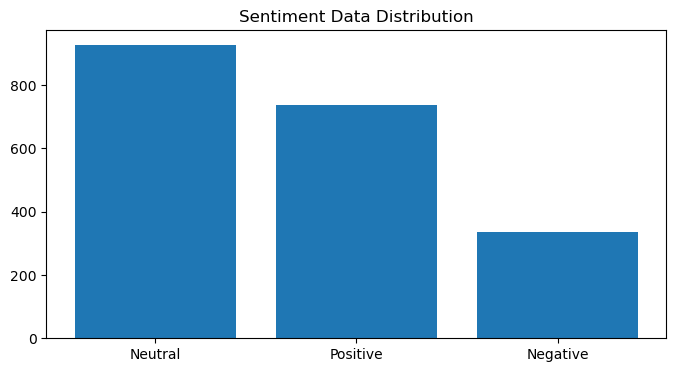

In [128]:
# Count the number of tweets in each sentiment category
val_count = df.sentiment.value_counts()

# Plot a bar chart to visualize the sentiment distribution
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [129]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

In [130]:
#Cleaning and removing the above stop words list from the tweet text
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
# new_stopwords = ["all", "due", "to", "on", "daily"]
# stop_words.extend(new_stopwords)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    @Tesco Hi Daniel, Thanks message. I’m sure I r...
1    RT @samd_official: Hey @Tesco I cook favourite...
2    @DiskinKyle @Cocksy87 @Tesco Even without touc...
3    RT @JodiPontin: @thewibblemovem1 @WelshGovernm...
4    @Tesco I need tampon man period 🤬 https://t.co...
Name: text, dtype: object

In [131]:
# Remove URLs
def remove_URLs(data):
    return re.sub('((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)',' ',data)
df['text'] = df['text'].apply(lambda x: remove_URLs(x))

In [132]:
#positive

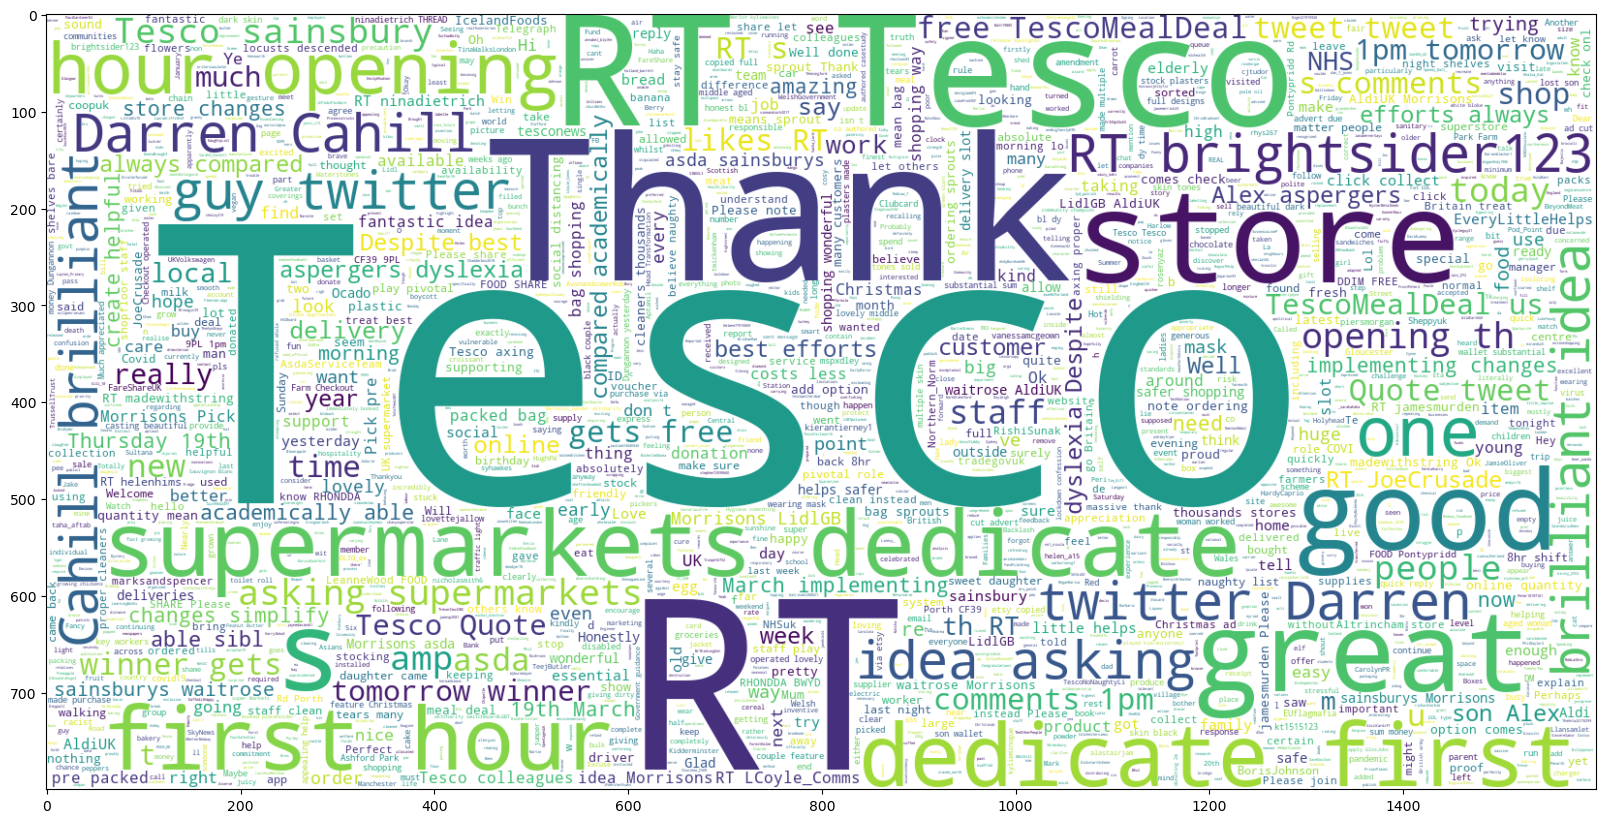

In [133]:
from wordcloud import WordCloud
#Creating a word cloud using all text from tweets classified as 'Positive'
plt.figure(figsize = (20,20))
wc = WordCloud(background_color = 'white',max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [134]:
#negative

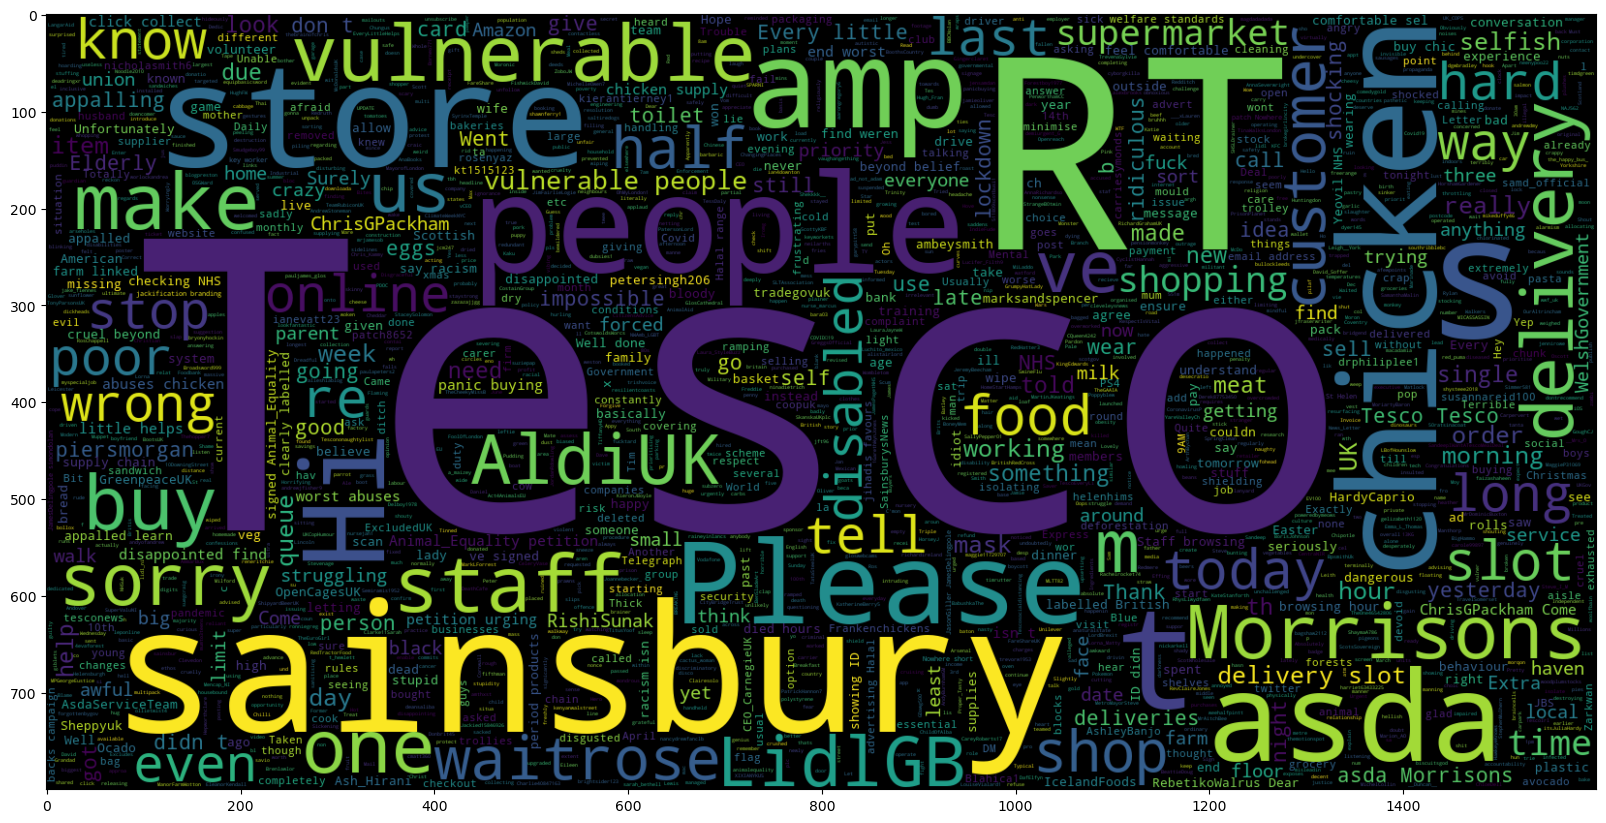

In [135]:
# Generate and display a word cloud for tweets classified as 'Negative'
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [136]:
from sklearn.model_selection import train_test_split
# Separating the 70% data for training data and 30% for testing data
trainsize = 0.7
X = df['text']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=1-trainsize,
                                         random_state=123) # Splits Dataset into Training and Testing set

In [137]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(ngram_range=(2,2), max_features=500000) 
X_train = vec.fit_transform(X_train) 
X_test = vec.transform(X_test)

In [138]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression

Training Accuracy : 0.995711222301644
Test Accuracy : 0.5923460898502496
[[ 15  60  16]
 [ 12 229  49]
 [  8 100 112]]


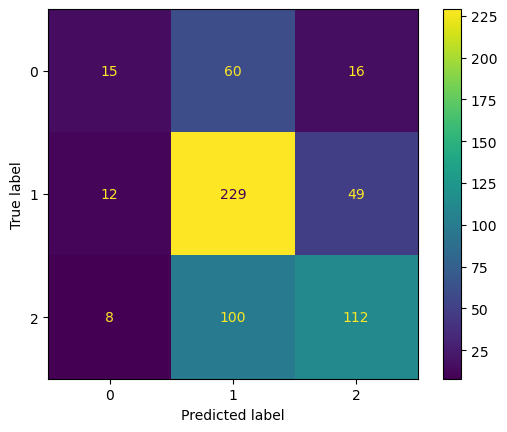

In [139]:
#Training a Multinomial Naive Bayes model on the training data
model_NB = MultinomialNB()
model_NB.fit(X_train, y_train)

y_pred = model_NB.predict(X_test)

print("Training Accuracy :", model_NB.score(X_train, y_train))
print("Test Accuracy :", model_NB.score(X_test, y_test))
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Training Accuracy : 1.0
Test Accuracy : 0.6006655574043261
[[  5  78   8]
 [  1 279  10]
 [  1 142  77]]


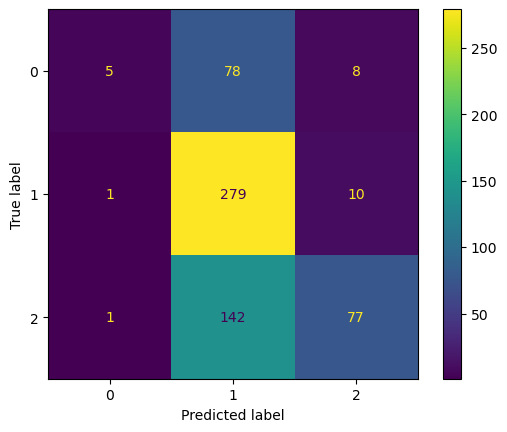

In [140]:
#Training a LogisticregRession Naive Bayes model on the training data
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Training Accuracy :", model.score(X_train, y_train))
print("Test Accuracy :", model.score(X_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [143]:
#lda

In [144]:
pip install contractions

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [145]:
pip install pyLDAvis

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [146]:
pip install spacy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [147]:
import pandas as pd
import unicodedata
import re
import contractions
import string
#Gensim
import gensim
import gensim.corpora as corpora
#spacy
import spacy
#vis
import pyLDAvis
import pyLDAvis.gensim_models

In [148]:
df['text'].isnull().sum()

0

In [149]:
# The LDA topic model algorithm requires a document word matrix and a dictionary as the main inputs.
# A document-term matrix is a mathematical matrix that describes the frequency of terms that occur in a collection of documents.
# In a document-term matrix, rows correspond to documents in the collection and columns correspond to terms.
# A Dictionary is collection of all unique tokens present in documents.
# For generating the document-term matrix and dictionary, first we will convert our sentences into tokens using the fucntion mentioned below.
# stop_words = set(['the','a'])
def generate_tokens(tweet):
    words=[]
    for word in tweet.split(' '):
    # using the if condition because we introduced extra spaces during text cleaning
         # if word != '' and word not in stop_words:
        if word!='':
           words.append(word)
    return words
#storing the generated tokens in a new column named 'tokens'
df['tokens']=df.text.apply(generate_tokens)

In [150]:
print(df.head())

           created_at                   id               id_str  \
0 2020-06-16 19:22:16  1272972781278371842  1272972781278371842   
1 2020-06-25 11:57:24  1276122318339743751  1276122318339743751   
2 2020-02-01 10:45:30  1223557982685929472  1223557982685929472   
3 2020-10-26 11:02:24  1320682185582645251  1320682185582645248   
4 2020-10-26 12:55:27  1320710633218781185  1320710633218781184   

                                                text  truncated  \
0  @Tesco Hi Daniel, Thanks message. I’m sure I r...       True   
1  RT @samd_official: Hey @Tesco I cook favourite...      False   
2  @DiskinKyle @Cocksy87 @Tesco Even without touc...      False   
3  RT @JodiPontin: @thewibblemovem1 @WelshGovernm...      False   
4                @Tesco I need tampon man period 🤬        False   

  in_reply_to_screen_name                                               user  \
0                   Tesco  {'id': 395919777, 'id_str': '395919777', 'name...   
1                    None  {'id': 

In [151]:
df['tokens'][0]

['@Tesco',
 'Hi',
 'Daniel,',
 'Thanks',
 'message.',
 'I’m',
 'sure',
 'I',
 'receipt',
 '-',
 'I',
 'bought',
 'within',
 'last',
 'year',
 'a…']

In [152]:
df['tokens'] = df['text'].apply(lambda x: x.split()) 

In [153]:
#Define a function to create a Gensim dictionary from a list of tokenized words
def create_dictionary(words):
    return corpora.Dictionary(words)
id2word=create_dictionary(df['tokens'])
print(id2word)

Dictionary<8472 unique tokens: ['-', '@Tesco', 'Daniel,', 'Hi', 'I']...>


In [154]:
def create_document_matrix(tokens,id2word):
    corpus = []
    for text in tokens:
        corpus.append(id2word.doc2bow(text))
    return corpus
#passing the dataframe column having tokens and dictionary
corpus=create_document_matrix(df['tokens'],id2word)
print(df['tokens'][0])
print(corpus[0])

['@Tesco', 'Hi', 'Daniel,', 'Thanks', 'message.', 'I’m', 'sure', 'I', 'receipt', '-', 'I', 'bought', 'within', 'last', 'year', 'a…']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1)]


In [155]:
id2word[10]

'message.'

In [156]:
#Training an LDA (Latent Dirichlet Allocation) topic model using Gensim
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=100,
                                             )

In [157]:
#lda_mode

In [158]:
#Training an LDA topic model using Gensim
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,
                                            random_state=100,
                                             )

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30, n_jobs=1)
vis

C:\ProgramData\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.171508  0.127309       1        1  14.348710
5      0.045335  0.129609       2        1  13.112823
8     -0.100446 -0.058534       3        1  13.098445
9     -0.104297  0.151467       4        1  10.955060
0      0.056533 -0.144792       5        1   9.832004
4     -0.039367  0.065206       6        1   9.325373
2     -0.054817 -0.182373       7        1   8.871400
3     -0.172130 -0.011853       8        1   7.939547
7      0.051802 -0.031101       9        1   6.819367
1      0.145878 -0.044937      10        1   5.697272, topic_info=                Term       Freq       Total Category  logprob  loglift
426                0  52.000000   52.000000  Default  30.0000  30.0000
16   @samd_official:  52.000000   52.000000  Default  29.0000  29.0000
15        (broccoli)  51.000000   51.000000  Default  28.0000  28.0000
25        unwrapping  51.000000   51.000000  Default  27.0000  27.0000
23         surprise,  51.000000   51.000000  Default  26.0000  26.0000
..               ...        ...         ...      ...      ...      ...
67       @sainsburys   4.410724  142.460980  Topic10  -5.7516  -0.6098
433             gets   2.536722   18.431343  Topic10  -6.3048   0.8820
258             I've   2.604883   23.381786  Topic10  -6.2783   0.6706
107            Tesco   2.924258   74.789188  Topic10  -6.1626  -0.3764
850            staff   2.745761   47.816252  Topic10  -6.2256   0.0079

[703 rows x 6 columns], token_table=      Topic      Freq                    Term
term                                         
3497      4  0.944019      #EveryLittleHelps…
3238      7  0.809673                #RHONDDA
3229      1  0.949311  #TescoEveryLittleHurts
425       1  0.054861          #TescoMealDeal
425       4  0.713189          #TescoMealDeal
...     ...       ...                     ...
3285      5  0.136210                       😂
3285      8  0.408630                       😂
1410      3  0.872806                       😳
3088      5  0.136025                       🥦
3088      7  0.680126                       🥦

[1676 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 9, 10, 1, 5, 3, 4, 8, 2])

In [159]:
pip install PyMuPDF

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
#lda


In [ ]:
!pip install --upgrade numpy


In [161]:
!pip install -q pandas gensim pyLDAvis bertopic nltk gdown matplotlib seaborn

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd
import gensim
import gensim.corpora as corpora
import pyLDAvis
import pyLDAvis.gensim_models
from bertopic import BERTopic
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('punkt')
nltk.download('stopwords')



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kavan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [162]:
tweet_file_path = "C:/Users/kavan/Downloads/tesco.json"

df = pd.read_json(tweet_file_path)
df.dropna(subset=['text'], inplace=True)

# Randomly sample 2000 tweets
df = df.sample(n=2000, random_state=42).reset_index(drop=True)

In [163]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [164]:
# ==============================
# Tokenization
# ==============================
nltk_stopwords = set(stopwords.words('english'))
custom_stopwords = {"company", "business", "year", "report", "customer", "service",
                    "employees", "products", "services", "organization", "work"}
final_stopwords = nltk_stopwords.union(custom_stopwords)

def tokenize_text(text):
    words = word_tokenize(str(text))
    return [word for word in words if word.isalnum() and word.lower() not in final_stopwords]

df['tokens'] = df['text'].apply(tokenize_text)

tweet_tokens_json = "C:/Users/kavan/Downloads/tesco.json"
df.to_json(tweet_tokens_json, index=False)

print(f"Tokenized tweets saved to {tweet_tokens_json}")


Tokenized tweets saved to C:/Users/kavan/Downloads/tesco.json


In [165]:
!pip install --upgrade huggingface_hub


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [166]:
from bertopic import BERTopic


In [167]:
!pip install huggingface_hub==0.13.3


Defaulting to user installation because normal site-packages is not writeable
  Using cached huggingface_hub-0.13.3-py3-none-any.whl.metadata (7.5 kB)
Using cached huggingface_hub-0.13.3-py3-none-any.whl (199 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.30.1
    Uninstalling huggingface-hub-0.30.1:
      Successfully uninstalled huggingface-hub-0.30.1


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 4.0.1 requires huggingface-hub>=0.20.0, but you have huggingface-hub 0.13.3 which is incompatible.
tokenizers 0.21.1 requires huggingface-hub<1.0,>=0.16.4, but you have huggingface-hub 0.13.3 which is incompatible.
transformers 4.50.3 requires huggingface-hub<1.0,>=0.26.0, but you have huggingface-hub 0.13.3 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [168]:
# ==============================
# Train LDA on Tweet Data
# ==============================
dictionary_tweet = corpora.Dictionary(df['tokens'])
corpus_tweet = [dictionary_tweet.doc2bow(text) for text in df['tokens']]

# here we use 5 topics, can you try different number of topics?
lda_model_tweet = gensim.models.LdaModel(
    corpus=corpus_tweet,
    id2word=dictionary_tweet,
    num_topics=10,
    random_state=100,
    passes=15,
    iterations=500,
    alpha='auto',
    eta='auto',
    minimum_probability=0.01
)

# Output LDA topics with top 10 keywords
print("\n=== LDA Topics ===")
for topic_id, words in lda_model_tweet.show_topics(num_topics=5, num_words=10, formatted=False):
    print(f"Topic {topic_id}: {[word for word, _ in words]}")

# ==============================
# Train BERTopic on Tweet Data
# ==============================
topic_model_tweet = BERTopic()
topics_tweet, probs_tweet = topic_model_tweet.fit_transform(df['text'])

# Get BERTopic topics
bertopic_topics = topic_model_tweet.get_topics()
num_bertopic_topics = len(bertopic_topics)

# Output BERTopic results
print(f"\n=== BERTopic: {num_bertopic_topics} Topics Found ===")
for topic_id, words in bertopic_topics.items():
    print(f"Topic {topic_id}: {[word for word, _ in words[:10]]}")


=== LDA Topics ===
Topic 9: ['Tesco', 'https', 'RT', 'ExposeLies2', 'VanillaismD', 'coolrunning2009', 'weaniejeanie53', 'RussellMoxham', 'maruligultom', 'Thanks']
Topic 7: ['Tesco', 'RT', 'https', 'little', 'ever', 'helps', 'shopping', 'Please', 'wonderful', 'list']
Topic 8: ['Tesco', 'https', 'RT', 'sainsburys', 'asda', 'Morrisons', 'AldiUK', 'LidlGB', 'waitrose', 'coopuk']
Topic 4: ['Tesco', 'https', 'RT', 'sainsburys', 'Morrisons', 'waitrose', 'LidlGB', 'asda', 'AldiUK', 'staff']
Topic 1: ['Tesco', 'https', 'get', 'RT', 'people', 'sainsburys', 'delivery', 'asda', 'shop', 'want']


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


=== BERTopic: 41 Topics Found ===
Topic -1: ['tesco', 'the', 'in', 'to', 'you', 'is', 'and', 'rt', 'for', 'of']
Topic 0: ['sainsburys', 'asda', 'morrisons', 'waitrose', 'lidlgb', 'aldiuk', 'tesco', 'coopuk', 'marksandspencer', 'you']
Topic 1: ['tesco', 'you', 'fuck', 'thats', 'thank', 'xx', 'thick', 'chriskammy', 'endlessummerria', 'estwilliams13']
Topic 2: ['broccoli', 'unwrapping', 'cook', 'vegetable', 'favourite', 'surprise', 'samdofficial', 'fo', 'my', 'hey']
Topic 3: ['your', 'items', 'store', 'on', 'are', 'these', 'the', 'tesco', 'not', 'online']
Topic 4: ['meal', 'the', 'bread', 'chicken', 'tesco', 'deal', 'eat', 'and', 'soup', 'sandwich']
Topic 5: ['nhs', 'staff', 'for', 'our', 'thank', 'who', 'you', 'the', 'to', 'workers']
Topic 6: ['dm', 'you', 'thanks', 'sent', 'thank', 'tesco', 'dmd', 'quick', 'it', 'reply']
Topic 7: ['some', 'safer', 'colleagues', 'shopping', 'everylittlehelps', 'helps', 'wonderful', 'because', 'ever', 'little']
Topic 8: ['food', 'donate', 'collection', '

In [169]:
# ==============================
# Train LDA on Tweet Data
# ==============================
dictionary_tweet = corpora.Dictionary(df['tokens'])
corpus_tweet = [dictionary_tweet.doc2bow(text) for text in df['tokens']]

# here we use 5 topics; adjust num_topics if desired
lda_model_tweet = gensim.models.LdaModel(
    corpus=corpus_tweet,
    id2word=dictionary_tweet,
    num_topics=5,
    random_state=42,
    passes=15,
    iterations=500,
    alpha='auto',
    eta='auto',
    minimum_probability=0.01
)

# Output LDA topics with top 10 keywords
print("\n=== LDA Topics ===")
for topic_id, words in lda_model_tweet.show_topics(num_topics=5, num_words=10, formatted=False):
    print(f"Topic {topic_id}: {[word for word, _ in words]}")

# ==============================
# Train BERTopic on Tweet Data
# ==============================
topic_model_tweet = BERTopic()
topics_tweet, probs_tweet = topic_model_tweet.fit_transform(df['text'])

# Get BERTopic topics and count them
bertopic_topics = topic_model_tweet.get_topics()
num_bertopic_topics = len(bertopic_topics)

# Output BERTopic results
print(f"\n=== BERTopic: {num_bertopic_topics} Topics Found ===")
for topic_id, words in bertopic_topics.items():
    print(f"Topic {topic_id}: {[word for word, _ in words[:10]]}")



=== LDA Topics ===
Topic 0: ['Tesco', 'https', 'RT', 'know', 'today', 'shopping', 'people', 'like', 'Hi', 'amp']
Topic 1: ['Tesco', 'https', 'RT', '0', 'tweet', 'get', 'free', 'Please', 'tomorrow', 'us']
Topic 2: ['Tesco', 'https', 'RT', 'morning', 'job', 'go', 'store', 'got', 'amp', 'call']
Topic 3: ['RT', 'Tesco', 'time', 'Hey', 'surprise', 'favourite', 'cook', 'broccoli', 'vegetable', 'unwrapping']
Topic 4: ['Tesco', 'https', 'sainsburys', 'RT', 'asda', 'Morrisons', 'AldiUK', 'waitrose', 'LidlGB', 'coopuk']

=== BERTopic: 40 Topics Found ===
Topic -1: ['tesco', 'the', 'in', 'to', 'you', 'and', 'is', 'of', 'rt', 'it']
Topic 0: ['sainsburys', 'asda', 'morrisons', 'waitrose', 'lidlgb', 'aldiuk', 'tesco', 'coopuk', 'marksandspencer', 'you']
Topic 1: ['tesco', 'you', 'fuck', 'thats', 'thank', 'just', 'euflagmafia', 'sheppyuk', 'kierantierney1', 'point']
Topic 2: ['your', 'items', 'store', 'the', 'on', 'these', 'tesco', 'in', 'are', 'you']
Topic 3: ['broccoli', 'unwrapping', 'cook', 'veg

In [170]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD

# Use a simple sklearn pipeline as embedding model
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a lightweight embedding model
tfidf = TfidfVectorizer()
svd_model = TruncatedSVD(n_components=100, random_state=42)
embedding_model = make_pipeline(tfidf, svd_model)

# Load BERTopic with this custom embedding model
topic_model = BERTopic(embedding_model=embedding_model)

# Fit on your data
topics, probs = topic_model.fit_transform(df['text'])

# Done!
print(topic_model.get_topics())


{-1: [('in', 0.017660768280194795), ('the', 0.015450898771753128), ('tesco', 0.014901057713230307), ('to', 0.013860932036394751), ('co', 0.013690396151741304), ('https', 0.0136154706984877), ('for', 0.012724419101121752), ('of', 0.012579065375964635), ('is', 0.011601041449218124), ('and', 0.011293853532844032)], 0: [('sainsburys', 0.07122109176286501), ('asda', 0.06728675740750929), ('morrisons', 0.06194892602256998), ('lidlgb', 0.05782293341947338), ('aldiuk', 0.055820205120295334), ('waitrose', 0.055533635147922415), ('icelandfoods', 0.028970542308099867), ('marksandspencer', 0.028303823415488837), ('coopuk', 0.024160796642148877), ('tesco', 0.018258206753597545)], 1: [('we', 0.07269612207941867), ('food', 0.05313156172490279), ('re', 0.02981248555335483), ('our', 0.027251601615365877), ('collection', 0.020207884759103515), ('rt', 0.018006034064008383), ('the', 0.01794985229832996), ('need', 0.01770643718088636), ('ve', 0.017131441421017142), ('in', 0.016966187509963513)], 2: [('unwr

In [171]:
import huggingface_hub
print(huggingface_hub.__version__)


0.30.1


In [172]:
from bertopic import BERTopic

# Train BERTopic on your tweet text column
topic_model_tweet = BERTopic()
topics_tweet, probs_tweet = topic_model_tweet.fit_transform(df['text'])

# Define bertopic_topics from the trained model
bertopic_topics = topic_model_tweet.get_topics()


In [173]:
from gensim.models.coherencemodel import CoherenceModel
from bertopic import BERTopic

# Extract the top 10 keywords for each BERTopic topic
ber_topic_tokens = [[word for word, _ in topic[:10]] for topic in bertopic_topics.values()]

# Filter out any empty topics to avoid errors
ber_topic_tokens = [topic for topic in ber_topic_tokens if topic]

# Compute Coherence Score for LDA
coherence_model_lda = CoherenceModel(
    model=lda_model_tweet, texts=df['tokens'], dictionary=dictionary_tweet, coherence='c_v'
)
coherence_lda = coherence_model_lda.get_coherence()

# Compute Coherence Score for BERTopic using the LDA dictionary
coherence_model_bertopic = CoherenceModel(
    topics=ber_topic_tokens, texts=df['tokens'], dictionary=dictionary_tweet, coherence='c_v'
)
coherence_bertopic = coherence_model_bertopic.get_coherence()

print(f"LDA Coherence Score: {coherence_lda:.3f}")
print(f"BERTopic Coherence Score: {coherence_bertopic:.3f}")

LDA Coherence Score: 0.336
BERTopic Coherence Score: 0.568


In [174]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from gensim.models.coherencemodel import CoherenceModel

#Create custom sklearn-based embedding model
tfidf = TfidfVectorizer()
svd_model = TruncatedSVD(n_components=100, random_state=42)
embedding_model = make_pipeline(tfidf, svd_model)

#Initialize and fit BERTopic
topic_model = BERTopic(embedding_model=embedding_model)
topics_tweet, probs_tweet = topic_model.fit_transform(df['text'])

#Extract topics
bertopic_topics = topic_model.get_topics()

#Prepare tokens for coherence calculation
ber_topic_tokens = [[word for word, _ in topic[:10]] for topic in bertopic_topics.values()]
ber_topic_tokens = [topic for topic in ber_topic_tokens if topic]

#Compute coherence
coherence_model_bertopic = CoherenceModel(
    topics=ber_topic_tokens,
    texts=df['tokens'],
    dictionary=dictionary_tweet,
    coherence='c_v'
)
coherence_bertopic = coherence_model_bertopic.get_coherence()

#Print result
print(f"BERTopic Coherence Score: {coherence_bertopic:.3f}")


BERTopic Coherence Score: 0.536


Num Topics: 2, Coherence Score: 0.2841
Num Topics: 3, Coherence Score: 0.2862
Num Topics: 4, Coherence Score: 0.2415
Num Topics: 5, Coherence Score: 0.3379
Num Topics: 6, Coherence Score: 0.2855
Num Topics: 7, Coherence Score: 0.3363
Num Topics: 8, Coherence Score: 0.3669
Num Topics: 9, Coherence Score: 0.3567
Num Topics: 10, Coherence Score: 0.3378
Num Topics: 11, Coherence Score: 0.3494
Num Topics: 12, Coherence Score: 0.3736
Num Topics: 13, Coherence Score: 0.3661
Num Topics: 14, Coherence Score: 0.3544
Num Topics: 15, Coherence Score: 0.3223
Num Topics: 16, Coherence Score: 0.3496
Num Topics: 17, Coherence Score: 0.3853
Num Topics: 18, Coherence Score: 0.3623
Num Topics: 19, Coherence Score: 0.3610


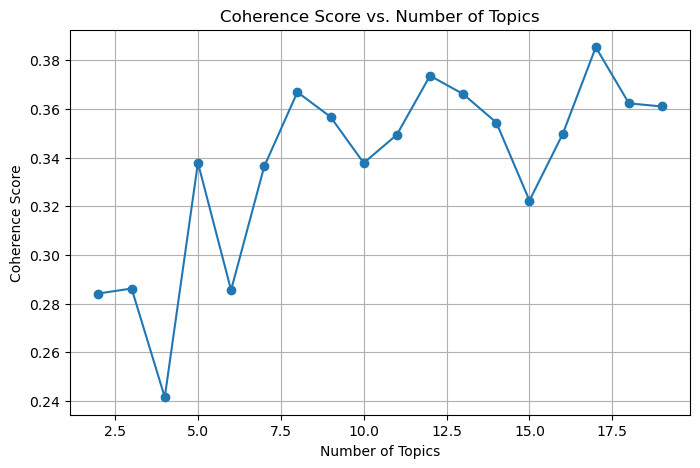

Optimal Number of Topics: 17


In [175]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

tokenized_texts = df['tokens'].tolist()

#Create a dictionary and a corpus for the LDA model
dictionary_tweet = corpora.Dictionary(tokenized_texts)
corpus_tweet = [dictionary_tweet.doc2bow(text) for text in tokenized_texts]

#Define a function to compute coherence scores for a range of topic numbers
def compute_coherence_values(dictionary, corpus, texts, topic_range):
    coherence_scores = []
    for num_topics in topic_range:
        lda_model = gensim.models.LdaModel(
            corpus=corpus,
            id2word=dictionary,
            num_topics=num_topics,
            random_state=42,
            passes=10,
            iterations=200
        )
        coherence_model = CoherenceModel(
            model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v'
        )
        coherence_score = coherence_model.get_coherence()
        coherence_scores.append(coherence_score)
        print(f"Num Topics: {num_topics}, Coherence Score: {coherence_score:.4f}")

    return coherence_scores


topic_range = range(2, 20)

coherence_scores = compute_coherence_values(dictionary_tweet, corpus_tweet, tokenized_texts, topic_range)

# Plot coherence scores to visually determine the optimal number of topics
plt.figure(figsize=(8, 5))
plt.figure(figsize=(8, 5))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='-')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.grid()
plt.show()

# Find and print the optimal number of topics based on the highest coherence score
optimal_topic_num = topic_range[coherence_scores.index(max(coherence_scores))]
print(f"Optimal Number of Topics: {optimal_topic_num}")



In [176]:
import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim

#Create dictionary and corpus from tokenized text data
dictionary_tweet = corpora.Dictionary(df['tokens'])
corpus_tweet = [dictionary_tweet.doc2bow(text) for text in df['tokens']]

#Setting the number of topics and train the LDA model
num_topics = 16
lda_model = gensim.models.LdaModel(
    corpus=corpus_tweet,
    id2word=dictionary_tweet,
    num_topics=num_topics,
    random_state=42,
    passes=10,
    iterations=200
)
#Enable notebook mode for pyLDAvis visualization
pyLDAvis.enable_notebook(local=True)

#Prepare and display the interactive LDA topic visualization
vis = pyLDAvis.gensim.prepare(lda_model, corpus_tweet, dictionary_tweet)

vis


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
4      0.031147  0.010514       1        1  9.452532
9      0.034453 -0.033410       2        1  8.918436
11    -0.005691 -0.052458       3        1  8.826922
6      0.066229 -0.029061       4        1  8.782955
5      0.054466 -0.085003       5        1  8.751785
14     0.026910  0.248398       6        1  8.637925
12    -0.012167 -0.046210       7        1  7.382052
1      0.032867 -0.030483       8        1  7.133631
3     -0.271160  0.002530       9        1  6.700828
2      0.058949 -0.020289      10        1  5.871708
15     0.021670  0.048415      11        1  4.566328
0      0.034903 -0.010504      12        1  4.342346
10    -0.055477 -0.026304      13        1  3.043567
8      0.004897  0.050331      14        1  2.979971
7     -0.017167 -0.016274      15        1  2.306693
13    -0.004828 -0.010191      16        1  2.302322, topic_info=            Term        Freq       Total Category  logprob  loglift
6           asda  126.000000  126.000000  Default  30.0000  30.0000
9     sainsburys  172.000000  172.000000  Default  29.0000  29.0000
164    Morrisons  117.000000  117.000000  Default  28.0000  28.0000
28        LidlGB   78.000000   78.000000  Default  27.0000  27.0000
155       AldiUK   83.000000   83.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
26       morning    1.288620   38.133132  Topic16  -5.9084   0.3837
422       giving    1.277666    9.137895  Topic16  -5.9169   1.8039
890         mask    1.277665   10.647539  Topic16  -5.9169   1.6510
1186     elderly    1.277664   13.809730  Topic16  -5.9169   1.3909
1503           2    1.277663   19.404424  Topic16  -5.9169   1.0508

[943 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
807       5  0.985919          0
1390      5  0.046687          1
1390      7  0.793672          1
1390      9  0.046687          1
1390     12  0.093373          1
...     ...       ...        ...
69        8  0.060473  yesterday
69       10  0.120945  yesterday
69       13  0.060473  yesterday
69       16  0.060473  yesterday
3871     14  0.710332         yn

[2162 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 10, 12, 7, 6, 15, 13, 2, 4, 3, 16, 1, 11, 9, 8, 14])

In [196]:
#Create a dictionary and corpus for LDA modeling from the tokenized tweets
dictionary_tweet = corpora.Dictionary(df['tokens'])
corpus_tweet = [dictionary_tweet.doc2bow(text) for text in df['tokens']]

#Train the LDA model with the specified number of topics
num_topics = 12
lda_model = gensim.models.LdaModel(
    corpus=corpus_tweet,
    id2word=dictionary_tweet,
    num_topics=num_topics,
    random_state=10,
    passes=10,
    iterations=200
)
#Enable notebook mode and visualize the topics using pyLDAvis
pyLDAvis.enable_notebook(local=True)
vis = pyLDAvis.gensim.prepare(lda_model, corpus_tweet, dictionary_tweet)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.063998  0.012634       1        1  24.605246
11    -0.046292 -0.028929       2        1  10.750462
2     -0.084696  0.108882       3        1   9.203655
3     -0.006820 -0.017898       4        1   8.134639
4      0.010232 -0.194970       5        1   7.591292
7     -0.040070  0.019557       6        1   7.177518
0     -0.018803 -0.006250       7        1   6.700822
6     -0.043666  0.088352       8        1   6.172030
9      0.015842 -0.049696       9        1   5.682845
8      0.246282  0.063773      10        1   5.325680
5      0.001707 -0.001116      11        1   5.211229
10     0.030282  0.005661      12        1   3.444583, topic_info=           Term        Freq       Total Category  logprob  loglift
807           0   50.000000   50.000000  Default  30.0000  30.0000
205         Hey   64.000000   64.000000  Default  29.0000  29.0000
164   Morrisons  114.000000  114.000000  Default  28.0000  28.0000
276    waitrose   85.000000   85.000000  Default  27.0000  27.0000
263    surprise   51.000000   51.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1449      hours    2.414784   15.285765  Topic12  -5.6832   1.5231
521       would    2.498369   19.510106  Topic12  -5.6492   1.3131
58        staff    2.628210   53.872313  Topic12  -5.5985   0.3481
303        nice    1.994178    6.468783  Topic12  -5.8746   2.1916
669          Hi    1.988461   31.897563  Topic12  -5.8775   0.5932

[703 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
807       2  0.019998      0
807       9  0.979883      0
1390      1  0.714994      1
1390      2  0.178749      1
1390      6  0.044687      1
...     ...       ...    ...
521      12  0.102511  would
332       1  0.284393  wrong
332       3  0.142197  wrong
332       6  0.142197  wrong
332       7  0.426590  wrong

[1471 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 12, 3, 4, 5, 8, 1, 7, 10, 9, 6, 11])

In [185]:
#Training an LDA model with 16 topics using the specified corpus and dictionary
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=16,
                                            random_state=100,
                                             )
#Enable pyLDAvis visualization in notebook mode
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, mds="mmds", R=30, n_jobs=1)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.059236  0.200270       1        1  10.535926
6     -0.173612  0.141412       2        1  10.279019
10     0.021182  0.145480       3        1   8.149752
8      0.187267  0.073324       4        1   7.504247
5     -0.072617  0.087539       5        1   6.882144
0      0.115475 -0.177895       6        1   6.596078
13     0.114231  0.159406       7        1   6.504093
14    -0.053177 -0.193767       8        1   6.152169
9     -0.150744  0.012942       9        1   5.974055
4      0.069530  0.049021      10        1   5.709163
12     0.184812 -0.058632      11        1   5.501922
2     -0.194295 -0.073329      12        1   4.881667
15     0.113606 -0.044868      13        1   4.657199
3     -0.026546 -0.066046      14        1   3.835765
7     -0.107805 -0.124143      15        1   3.637704
1      0.031930 -0.130712      16        1   3.199096, topic_info=            Term         Freq        Total Category  logprob  loglift
426            0    48.000000    48.000000  Default  30.0000  30.0000
1         @Tesco  1143.000000  1143.000000  Default  29.0000  29.0000
15    (broccoli)    55.000000    55.000000  Default  28.0000  28.0000
25    unwrapping    55.000000    55.000000  Default  27.0000  27.0000
23     surprise,    55.000000    55.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
349          way     1.505162    25.494197  Topic16  -6.2497   0.6128
1552    shopping     1.522197    42.288632  Topic16  -6.2384   0.1179
466         idea     1.300791    40.643426  Topic16  -6.3956   0.0004
79         order     1.281949    18.563590  Topic16  -6.4102   0.7695
454         well     1.263485    12.224054  Topic16  -6.4247   1.1728

[1181 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
206       2  0.119475     !
206       5  0.119475     !
206       6  0.119475     !
206       8  0.477901     !
206      12  0.119475     !
...     ...       ...   ...
8242      4  0.675038  😬😬we
3088      4  0.277236     🥦
3088     12  0.415854     🥦
3088     16  0.138618     🥦
7997      5  0.703204     🥳

[2950 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 7, 11, 9, 6, 1, 14, 15, 10, 5, 13, 3, 16, 4, 8, 2])

In [177]:
!pip install textblob


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [178]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kavan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
#sentimental analysis

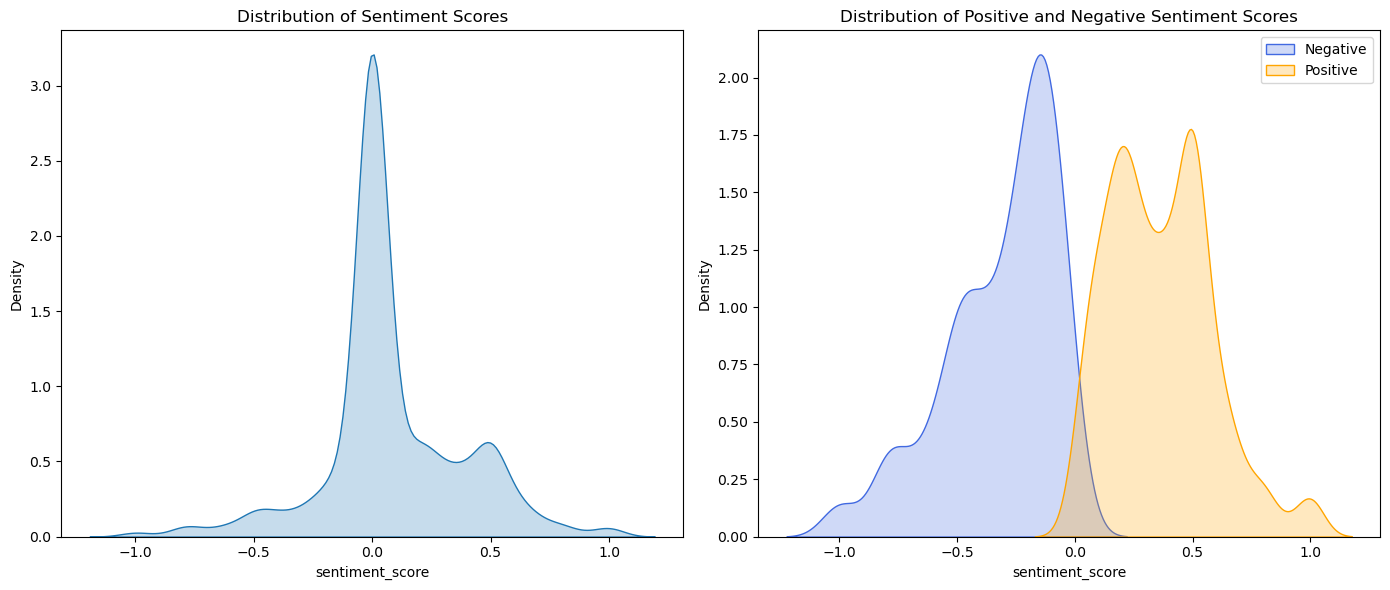

In [195]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Calculate sentiment polarity
df['sentiment_score'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Split positive and negative for the second plot
positive_scores = df[df['sentiment_score'] > 0]['sentiment_score']
negative_scores = df[df['sentiment_score'] < 0]['sentiment_score']

# Plotting
plt.figure(figsize=(14, 6))

# Overall sentiment distribution
plt.subplot(1, 2, 1)
sns.kdeplot(df['sentiment_score'], fill=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('sentiment_score')
plt.ylabel('Density')

# Positive and negative sentiment
plt.subplot(1, 2, 2)
sns.kdeplot(negative_scores, fill=True, label="Negative", color="royalblue")
sns.kdeplot(positive_scores, fill=True, label="Positive", color="orange")
plt.title('Distribution of Positive and Negative Sentiment Scores')
plt.xlabel('sentiment_score')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()